## <span style="color:blue; font-weight : bold; font-family:'Times New Roman';">Problem Statement</span>

### <span style=" font-family:'abadi';font-style:italic;">The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default</span>

* <span style=" font-family:'abadi';font-style:italic;">Analyse the Lending applicants data of Lending Club from 2007 to 2011</span>
* <span style=" font-family:'abadi';font-style:italic;">Minimise the risk of losing money while lending to urban customers</span>
* <span style=" font-family:'abadi';font-style:italic;">Avoid Financial loss by not lending to applicants likely to default</span>
* <span style=" font-family:'abadi';font-style:italic;">Identify the Patterns for applicants likely to default</span>

## <span style="color:blue; font-weight : bold; font-family:abadi">Main Objective </span>

* <span style=" font-family:'abadi';font-style:italic;">Avoid Business loss by lending to applicants who likely to repay the loan</span>
* <span style=" font-family:'abadi';font-style:italic;">Avoid Financial Loss by rejecting applicants who are likely to default </span>

In [1]:
## Importing required Libraries
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings(action = "ignore")

In [2]:
## Importing Loan file for EDA Analysis
loan_club = pd.read_csv("loan.csv")

# Checking number of rows and columns in Loan uploaded file
loan_club.shape

(39717, 111)

In [3]:
## Checking for header of data 
loan_club.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [4]:
## Checking for footer of uploaded Loan data file
loan_club.tail()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
39712  92187      92174       2500         2500           1075.0   36 months   
39713  90665      90607       8500         8500            875.0   36 months   
39714  90395      90390       5000         5000           1325.0   36 months   
39715  90376      89243       5000         5000            650.0   36 months   
39716  87023      86999       7500         7500            800.0   36 months   

      int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
39712    8.07%        78.42     A        A4  ...                NaN   
39713   10.28%       275.38     C        C1  ...                NaN   
39714    8.07%       156.84     A        A4  ...                NaN   
39715    7.43%       155.38     A        A2  ...                NaN   
39716   13.75%       255.43     E        E2  ...                NaN   

      num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75  \
39712                NaN            NaN               NaN   
39713                NaN            NaN               NaN   
39714                NaN            NaN               NaN   
39715                NaN            NaN               NaN   
39716                NaN            NaN               NaN   

      pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort  \
39712                  NaN       NaN             NaN               NaN   
39713                  NaN       NaN             NaN               NaN   
39714                  NaN       NaN             NaN               NaN   
39715                  NaN       NaN             NaN               NaN   
39716                  NaN       NaN             NaN               NaN   

      total_bc_limit total_il_high_credit_limit  
39712            NaN                        NaN  
39713            NaN                        NaN  
39714            NaN                        NaN  
39715            NaN                        NaN  
39716            NaN                        NaN  

[5 rows x 111 columns]

In [5]:
### We dont have any header or footer records to remove. 
## Setting display Options

pd.set_option("display.max_rows",500)
pd.set_option("display.max_columns",500)
loan_club.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

### Data Cleansing 

In [6]:
# Checking for number of columns with null values 
null_columns = np.round((loan_club.isna().sum())/len(loan_club)*100,2 )
null_columns

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.59
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [7]:
## Filtering list of Columns with more than 30 percent of null values
null_columns = null_columns[null_columns > 30]
null_columns

desc                               32.59
mths_since_last_delinq             64.66
mths_since_last_record             92.99
next_pymnt_d                       97.13
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m                       100.00
open_rv_24m                       100.00
max_bal_bc                        100.00
all_util                          100.00
total_rev_hi_lim                  100.00
inq_fi                            100.00
total_cu_tl                       100.00
inq_last_12m    

In [8]:
# Checking about number of columns that have more than 30 percent of null values
len(null_columns)

58

In [9]:
# Creating a list for columns with Null values
null_columns = list(null_columns.index)
null_columns

['desc',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_pa

In [10]:
## Drop Columns with more than 30 percent of Null Values
loan_club.drop(labels = null_columns, axis = 1, inplace = True)

In [11]:
## Now checking details of rows and columns of Loan_club data set
loan_club.shape

(39717, 53)

In [12]:
## Again checking for fields with null values in Loan_Club Data Set.
null_columns1 = np.round((loan_club.isna().sum())/len(loan_club)*100,2 )
null_columns1 = null_columns1[null_columns1 > 0]
null_columns1

emp_title                     6.19
emp_length                    2.71
title                         0.03
revol_util                    0.13
last_pymnt_d                  0.18
last_credit_pull_d            0.01
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
pub_rec_bankruptcies          1.75
tax_liens                     0.10
dtype: float64

In [13]:
## Dropping Columns with Text as these are not required for EDA.
loan_club = loan_club.drop(['emp_title','title'], axis = 1)

In [14]:
## To find Columns with Unique Values as these columns are not utilised for Analysis
[col for col in loan_club.columns if loan_club[col].dropna().is_unique]

['id', 'member_id', 'url']

In [15]:
## Drop Text Columns which are not required for EDA
loan_club.drop(['id', 'member_id', 'url'], axis = 1, inplace =True)


In [16]:
## Analysing Other Columns in Data Set 
loan_club.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [17]:
## Finding fields with single values in columns of data set
Uni_fields = loan_club.nunique()[loan_club.nunique()== 1]
Uni_fields

pymnt_plan                    1
initial_list_status           1
collections_12_mths_ex_med    1
policy_code                   1
application_type              1
acc_now_delinq                1
chargeoff_within_12_mths      1
delinq_amnt                   1
tax_liens                     1
dtype: int64

In [18]:
## Preparing list of single Value Columns as they are not Useful
Uni_fields = list(Uni_fields.index)
Uni_fields


['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [19]:
## Dropping Single Value Columns
loan_club = loan_club.drop( labels = Uni_fields, axis =1)

In [20]:
## Further Analysing Fields For Data Cleansing
loan_club.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [21]:
### Checking Loan Status for all records in data set
loan_club.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [22]:
## Deleting rows with Current Status as we cannot confirm if they are going to be charged off or Fully Paid
loan_club = loan_club[~(loan_club.loan_status == 'Current')]
loan_club.shape

(38577, 39)

In [23]:
## Deleting Column with sub_grade as we are going to limit analysis for only grade
loan_club = loan_club.drop('sub_grade', axis = 1)
loan_club.shape

(38577, 38)

In [24]:
## Preparing list of few columns as this data is not available while processing Loan Application and they are not utilised for Analysis to approve loan Application
behav_col = ['installment','delinq_2yrs','earliest_cr_line','inq_last_6mths','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv',
            'total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt',
            'last_credit_pull_d']
behav_col

['installment',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d']

In [25]:
### Dropping these columns for further Analysis
loan_club = loan_club.drop(labels = behav_col, axis = 1)
loan_club.shape

(38577, 22)

In [26]:
loan_club.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')

In [27]:
## Analysing zip_code Column
len(loan_club.zip_code.unique())

822

In [28]:
## Removing Zip_code column as we will be analysing based on addr_state level
loan_club = loan_club.drop('zip_code', axis = 1)
loan_club.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')

In [29]:
## Checking for Null Values again to confirm Cleansing done properly
null_columns = np.round((loan_club.isna().sum())/len(loan_club)*100,2 )
null_columns = null_columns[null_columns > 0]
null_columns

emp_length              2.68
revol_util              0.13
pub_rec_bankruptcies    1.81
dtype: float64

In [30]:
### Dropping records with null values as they are less than 5 percent of data
loan_club = loan_club[~loan_club.emp_length.isna()]
loan_club = loan_club[~loan_club.revol_util.isna()]
loan_club = loan_club[~loan_club.pub_rec_bankruptcies.isna()]
loan_club.shape

(36800, 21)

In [31]:
### Final Check for null Values
null_columns = np.round((loan_club.isna().sum())/len(loan_club)*100,2 )
null_columns = null_columns[null_columns > 0]
null_columns

Series([], dtype: float64)

In [32]:
### As we have no null values now, we can proceed with further fixing data types of columns
loan_club.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
grade                    object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
pub_rec_bankruptcies    float64
dtype: object

In [33]:
### Delete columns revol_bal and revol_util as they are not required for analysis
loan_club = loan_club.drop(['revol_bal','revol_util'], axis = 1)

In [34]:
### We have to change data type of term as integer
# loan_amnt, funded_amnt, int_rate as float
loan_club.term.value_counts()
loan_club.term = loan_club.term.apply(lambda x: int(x.replace(" months","")))


In [35]:
### Fixing of int_rate Column Data type
loan_club.int_rate = loan_club.int_rate.apply(lambda x: float(x.replace("%","")))
loan_club.int_rate.dtype

dtype('float64')

In [36]:
## Fixing Loan_amnt and funded_amnt data types
loan_club = loan_club.astype({'loan_amnt':'float', 'funded_amnt':'float'})
loan_club.dtypes


loan_amnt               float64
funded_amnt             float64
funded_amnt_inv         float64
term                      int64
int_rate                float64
grade                    object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
open_acc                  int64
pub_rec                   int64
total_acc                 int64
pub_rec_bankruptcies    float64
dtype: object

In [37]:
## Changing to Date format for issue_d
loan_club.issue_d = pd.to_datetime(loan_club.issue_d, format = '%b-%y')
loan_club.issue_d

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39562   2007-11-01
39573   2007-11-01
39623   2007-10-01
39666   2007-08-01
39680   2007-08-01
Name: issue_d, Length: 36800, dtype: datetime64[ns]

In [180]:
## Getting Year and Month details seperately
loan_club.Year = pd.DatetimeIndex(loan_club['issue_d']).year
loan_club.Month = pd.DatetimeIndex(loan_club['issue_d']).month


Text(0.5, 1.0, 'Issued Year')

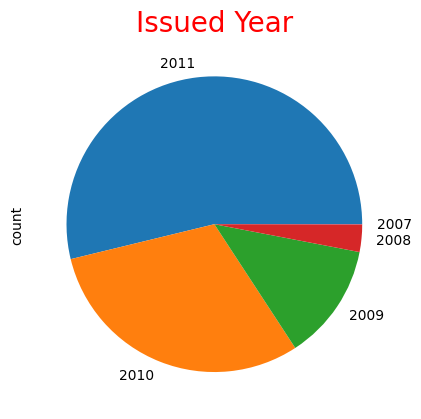

In [181]:
### Plotting Month and Year
loan_club.Year.value_counts().plot.pie()
plt.title("Issued Year", color ='red',fontsize = 20)

Text(0.5, 1.0, 'Issued Month Analysis')

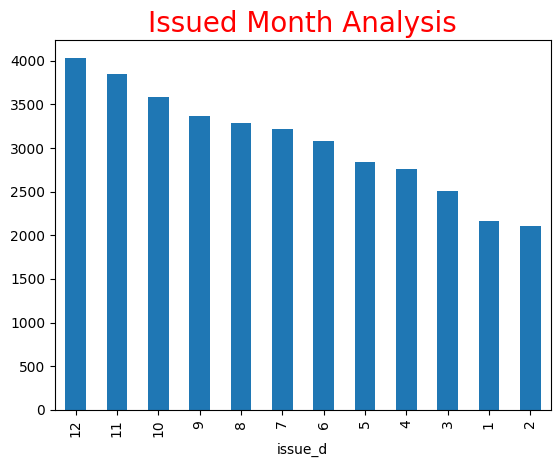

In [182]:
### We can observe that most loans are issued in 2011 and least number of loans in 2007
loan_club.Month.value_counts().plot.bar()
plt.title("Issued Month Analysis", color ='red', fontsize = 20)

In [41]:
## Here, we have least number of loan taken in February and most number of loans in December.

{'whiskers': [<matplotlib.lines.Line2D at 0x2beb015f9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2beb0168dd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2beaffa7710>],
 'medians': [<matplotlib.lines.Line2D at 0x2beb016a1d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2beb016ac50>],
 'means': []}

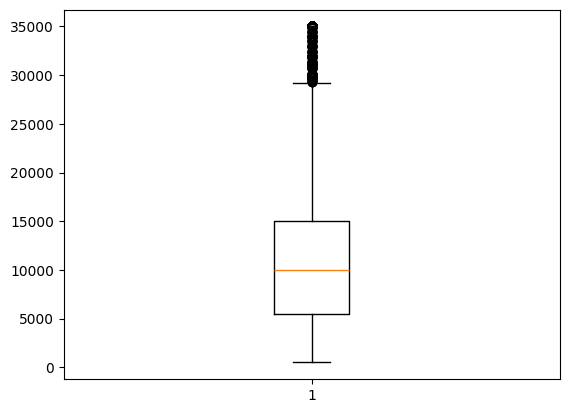

In [42]:
### Univariate Analysis
# Loan_amnt
plt.boxplot(loan_club.loan_amnt)

In [43]:
## Here we understand that Outliers are continuous, and we dont have to remove outliers and continue analysis.

Text(0.5, 1.0, 'Barplot of Loan_Amount')

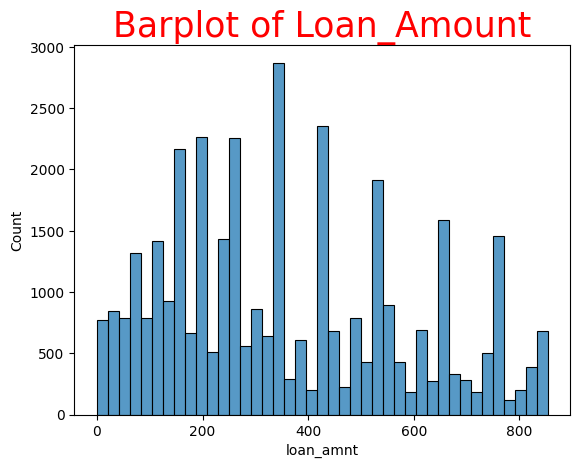

In [165]:
### We observe that there are outliers present
sns.histplot(loan_club.loan_amnt)
plt.title("Barplot of Loan_Amount",color = 'red', size = 25)

<Axes: xlabel='loan_amnt', ylabel='Count'>

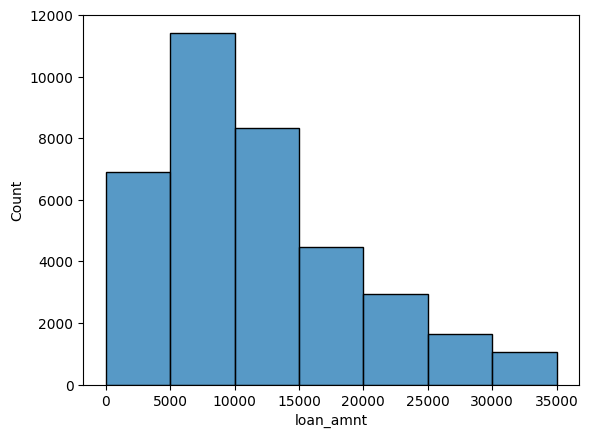

In [45]:
### We observe that most of the records exist between 5K and 10K
sns.histplot(x = loan_club.loan_amnt, bins = [0,5000,10000,15000,20000,25000,30000,35000])

In [46]:
### Adding derived column loan_amnt_sub, this is for creating buckets for loan_amnt to support analysis.

def loan_amnt_sub (col):
    if col <=5000:
        return '0-5K'
    elif (col >5000) and (col <=10000):
        return '5K-10K'
    elif (col >10000) and (col <=15000):
        return '10K-15K'
    elif (col >15000) and (col <=20000):
        return '15K-20K'
    elif (col >20000) and (col <=25000):
        return '20K-25K'
    elif (col >25000) and (col <=30000):
        return '25K-30K'  
    else:
        return '30K-35K'
loan_club['loan_amnt_sub']=loan_club.apply(lambda x:loan_amnt_sub(x['loan_amnt']),axis=1)

<Axes: xlabel='funded_amnt', ylabel='Count'>

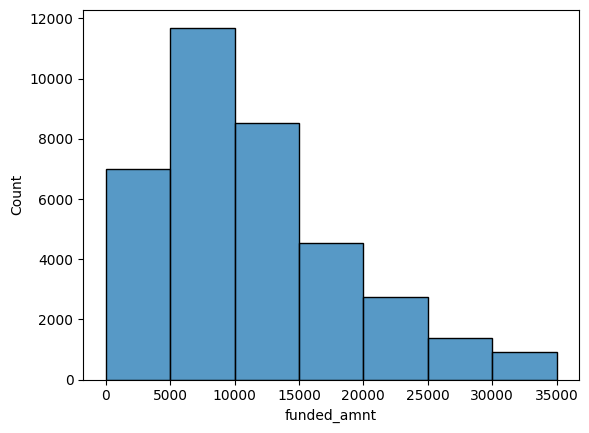

In [47]:
#### Analysis for funded_amnt
sns.histplot(x = loan_club.funded_amnt, bins = [0,5000,10000,15000,20000,25000,30000,35000])

<Axes: xlabel='funded_amnt_inv', ylabel='Count'>

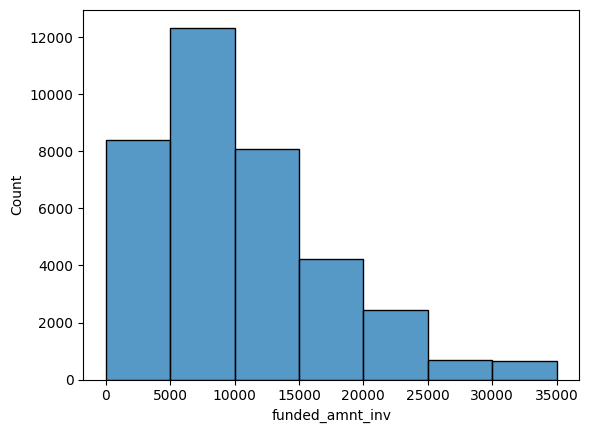

In [48]:
### Funded_amnt behaves similar to Loan Amount
## Analysis for Funded_amnt_inv
sns.histplot(x = loan_club.funded_amnt_inv, bins = [0,5000,10000,15000,20000,25000,30000,35000])

Text(0.5, 1.0, 'Bar Plot for Term')

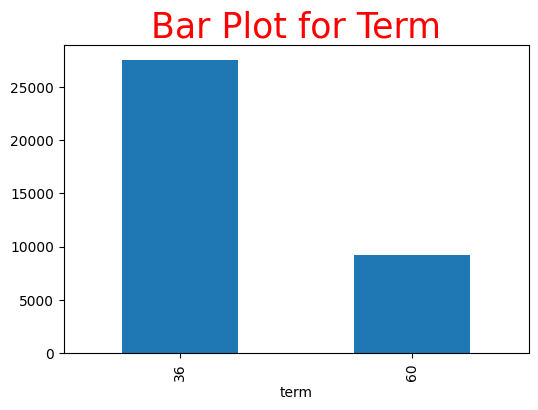

In [167]:
### Funded_amnt_inv behaves same as Loan_amnt, Funded_amnt
## Term Column Analysis
plt.figure(figsize = (6,4))
loan_club.term.value_counts().plot.bar()
plt.title("Bar Plot for Term", color = 'red', size = 25)



Text(0.5, 1.0, 'Int_rate')

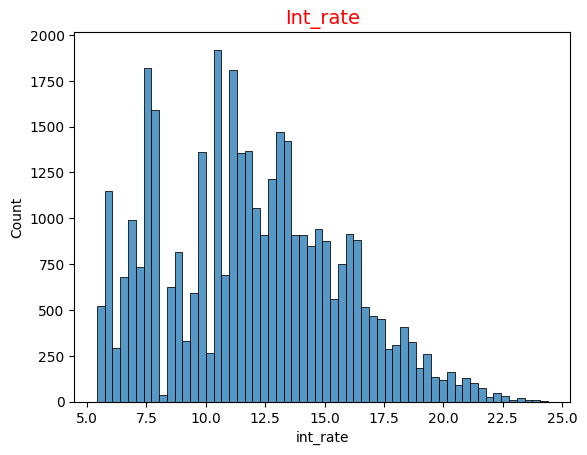

In [170]:
#### We have more loan accounts with 36 months as term for loan 
## int_rate analysis
sns.histplot(loan_club.int_rate)
plt.title("Int_rate",fontsize = 14, color = 'red')

Text(0.5, 1.0, 'Int_rate')

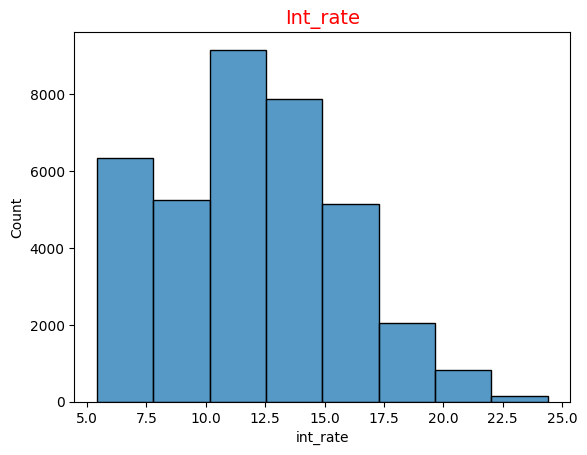

In [171]:
sns.histplot(loan_club.int_rate, bins = 8)
plt.title("Int_rate",fontsize = 14, color = 'red')

<Axes: xlabel='int_rate_sub', ylabel='Count'>

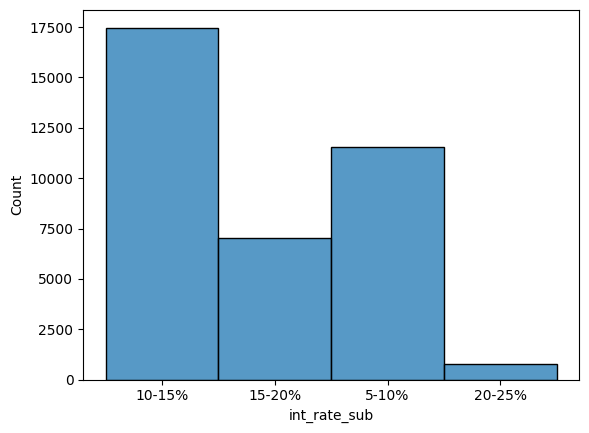

In [52]:
### We have very less Loans with more than 20 percent of Int_rate. 
## Adding derived column int_rate_sub, this is for creating buckets for int_rate to support analysis.

def int_rate_sub (col):
    if col <=10:
        return '5-10%'
    elif (col >10) and (col <=15):
        return '10-15%'
    elif (col >15) and (col <=20):
        return '15-20%'  
    else:
        return '20-25%'
loan_club['int_rate_sub']=loan_club.apply(lambda x:int_rate_sub(x['int_rate']),axis=1)
sns.histplot(loan_club.int_rate_sub)

<Axes: ylabel='annual_inc'>

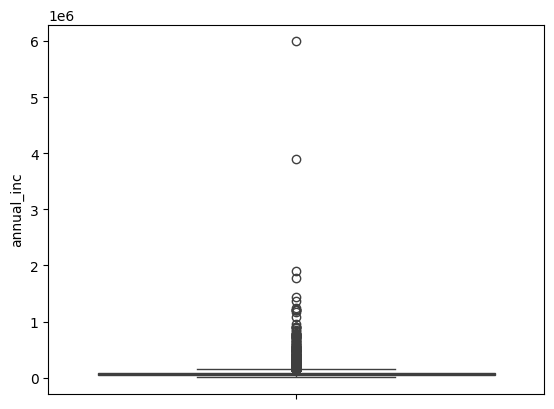

In [53]:
### Analysing Annual_inc column to remove any Outliers.
sns.boxplot(loan_club.annual_inc)

In [54]:
## Here we can check that Annual_inc field has scattered outliers and we need to fix this for further analysis.
# We can check data and from the graph, we can understand that data with annual_inc more than 1500000 these are outliers. 
## Check data for these records.
loan_club[loan_club.annual_inc > 1000000]

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate grade  \
7247     12025.0      12025.0      12000.00000    36     14.27     C   
10621    15775.0      15775.0      15750.00000    60     12.99     C   
21412    10000.0      10000.0       9500.00000    36      6.54     A   
23551     1500.0       1500.0       1500.00000    36      6.17     A   
24166    25000.0      25000.0      24493.46353    60     15.20     D   
25762    12000.0      12000.0      12000.00000    36      7.51     A   
27564     5600.0       5600.0       5600.00000    60     13.61     C   
28906     4500.0       4500.0       4500.00000    60      7.88     A   
29639    25000.0      15500.0      11430.00082    60     10.62     B   
30107     5000.0       5000.0       5000.00000    36     12.73     C   
33432    10000.0      10000.0       9650.00000    36      7.74     A   
33982     6400.0       6400.0       6300.00000    36      7.40     A   
34304     6600.0       6600.0       6600.00000    36      7.74     A   

      emp_length home_ownership  annual_inc verification_status    issue_d  \
7247   10+ years           RENT   1782000.0        Not Verified 2011-09-01   
10621    2 years       MORTGAGE   1250000.0            Verified 2011-07-01   
21412  10+ years            OWN   1200000.0            Verified 2011-01-01   
23551    5 years       MORTGAGE   1900000.0     Source Verified 2010-11-01   
24166  10+ years           RENT   1200000.0     Source Verified 2010-11-01   
25762     1 year       MORTGAGE   1200000.0        Not Verified 2010-09-01   
27564  10+ years       MORTGAGE   1176000.0     Source Verified 2010-07-01   
28906    8 years       MORTGAGE   1080000.0     Source Verified 2010-06-01   
29639    3 years       MORTGAGE   3900000.0        Not Verified 2010-06-01   
30107  10+ years       MORTGAGE   6000000.0     Source Verified 2010-05-01   
33432     1 year       MORTGAGE   1200000.0        Not Verified 2009-12-01   
33982    7 years       MORTGAGE   1440000.0        Not Verified 2009-11-01   
34304    9 years       MORTGAGE   1362000.0        Not Verified 2009-11-01   

       loan_status             purpose addr_state    dti  open_acc  pub_rec  \
7247    Fully Paid  debt_consolidation         NY   1.31         9        0   
10621  Charged Off  debt_consolidation         MI  21.81        10        0   
21412   Fully Paid  debt_consolidation         CT   1.46         6        0   
23551   Fully Paid         credit_card         TX   0.57        17        0   
24166   Fully Paid  debt_consolidation         LA   0.41         4        0   
25762   Fully Paid  debt_consolidation         NJ   9.17        12        0   
27564   Fully Paid               other         MD   1.22         6        0   
28906   Fully Paid      major_purchase         MD   0.57         7        0   
29639   Fully Paid    home_improvement         NM   0.20        12        0   
30107   Fully Paid    home_improvement         CA   0.01         2        0   
33432   Fully Paid               other         NY   0.80        11        0   
33982   Fully Paid      major_purchase         CA   0.00         6        0   
34304   Fully Paid  debt_consolidation         CO   0.62        13        0   

       total_acc  pub_rec_bankruptcies loan_amnt_sub int_rate_sub  
7247          30                   0.0       10K-15K       10-15%  
10621         28                   0.0       15K-20K       10-15%  
21412         13                   0.0        5K-10K        5-10%  
23551         36                   0.0          0-5K        5-10%  
24166         12                   0.0       20K-25K       15-20%  
25762         26                   0.0       10K-15K        5-10%  
27564         25                   0.0        5K-10K       10-15%  
28906         20                   0.0          0-5K        5-10%  
29639         32                   0.0       20K-25K       10-15%  
30107         10                   0.0          0-5K       10-15%  
33432         20                   0.0        5K-1

<Axes: ylabel='annual_inc'>

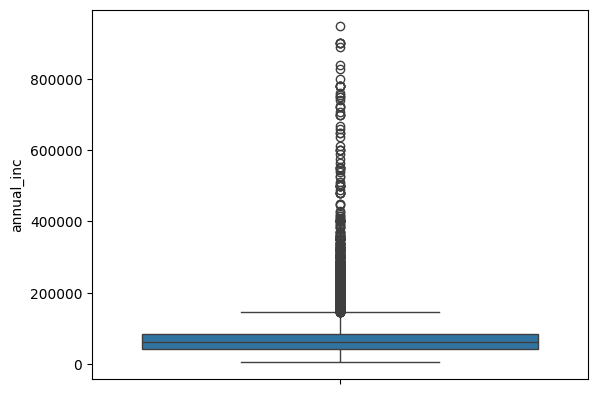

In [55]:
### If we observe all these records are for fully paid and we dont have much charged off records. So we will remove these records and continue our analysiss.
loan_club = loan_club[~(loan_club.annual_inc > 1000000)]
sns.boxplot(loan_club.annual_inc)

In [ ]:
## From the above graph we observe that most of the loans are with 10-15% and very least with 20-25% interest rate
## Adding derived column Annu_inc_sub, this is for creating buckets for Annual_inc to support analysis.

def annu_inc_sub (col):
    if col <= 30000:
        return '4K - 30K'
    elif (col > 30000) and (col <= 40000):
        return '30K - 40K'
    elif (col > 40000) and (col <= 50000):
        return '40K - 50K'
    elif (col > 50000) and (col <= 60000):
        return '50K - 60K'
    elif (col > 60000) and (col <= 70000):
        return '60K - 70K'
    elif (col > 70000) and (col <= 80000):
        return '70K - 80K'
    elif (col > 80000) and (col <= 100000):
        return '80K - 100K'
    elif (col > 100000) and (col <= 200000):
        return '100K - 200K'
    else:
        return '200K+'
loan_club['annu_inc_sub']=loan_club.apply(lambda x:annu_inc_sub(x['annual_inc']),axis=1)    

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, '4K - 30K'),
  Text(1, 0, '40K - 50K'),
  Text(2, 0, '30K - 40K'),
  Text(3, 0, '70K - 80K'),
  Text(4, 0, '80K - 100K'),
  Text(5, 0, '100K - 200K'),
  Text(6, 0, '50K - 60K'),
  Text(7, 0, '60K - 70K'),
  Text(8, 0, '200K+')])

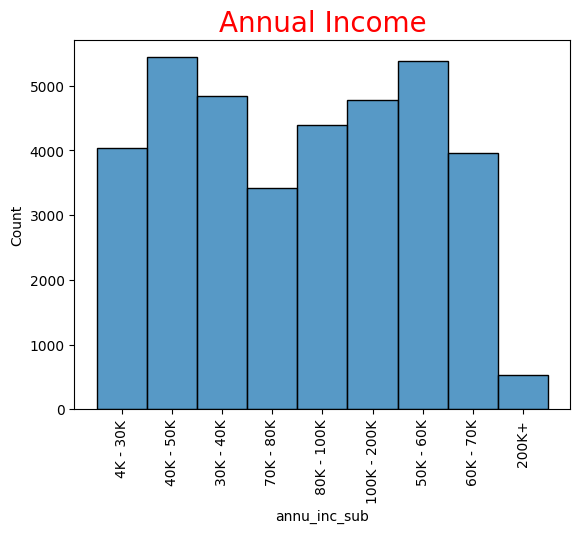

In [176]:
## Plotting this Annu_inc_sub for analysing Data set
sns.histplot(loan_club.annu_inc_sub)
plt.title("Annual Income",color = 'red',fontsize =20)
plt.xticks(rotation = 90)

<Axes: xlabel='dti', ylabel='Count'>

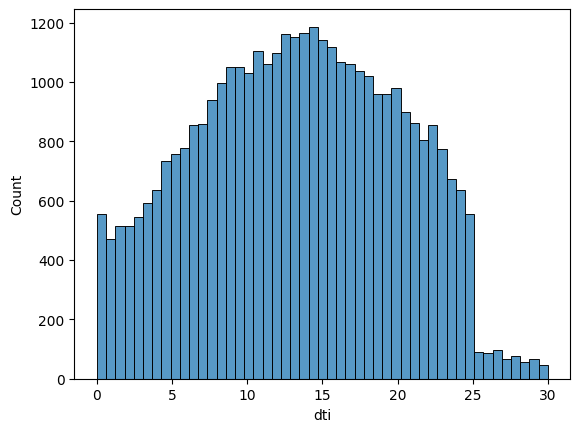

In [58]:
## Analyse dti
sns.histplot(loan_club.dti)

Text(0.5, 1.0, 'DTI Analysis')

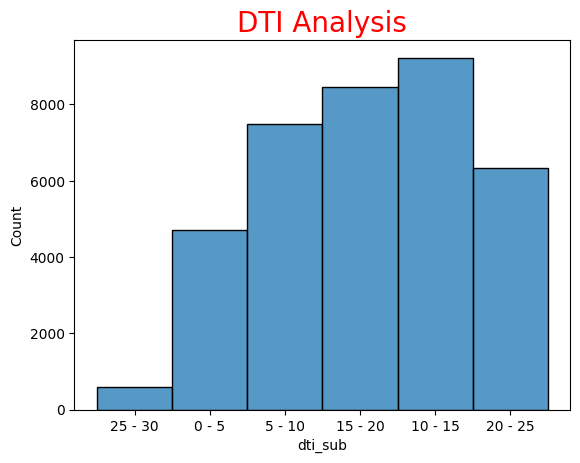

In [177]:
# Observation is that with dti between 25 and 30, there are less counts when compared to with dti less than 25.
## Adding derived column dti_sub, this is for creating buckets for dti to support analysis.

def dti_sub(col):
    if col <= 5:
        return '0 - 5'
    elif (col > 5) and (col <= 10):
        return '5 - 10'
    elif (col > 10) and (col <= 15):
        return '10 - 15'
    elif (col > 15) and (col <= 20):
        return '15 - 20'
    elif (col > 20) and (col <= 25):
        return '20 - 25'
    else:
        return '25 - 30'
    
loan_club['dti_sub'] = loan_club.apply( lambda x: dti_sub(x['dti']), axis = 1 )    
sns.histplot(loan_club.dti_sub)
plt.title("DTI Analysis",color = 'red',fontsize = 20)

In [60]:
# Analysing derived field dti_sub
loan_club.dti_sub.value_counts()

dti_sub
10 - 15    9228
15 - 20    8450
5 - 10     7487
20 - 25    6327
0 - 5      4699
25 - 30     596
Name: count, dtype: int64

Text(0.5, 1.0, 'Loan_status')

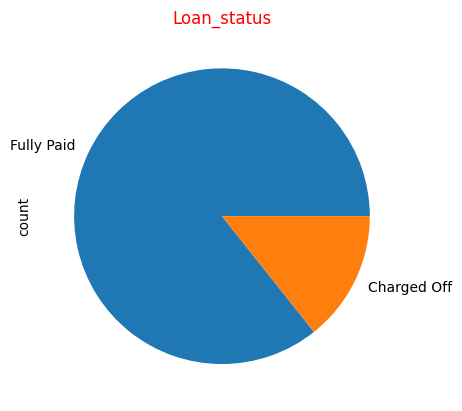

In [178]:
### Plotting Loan_status to see the counts
loan_club.loan_status.value_counts().plot.pie()
plt.title("Loan_status", color = 'red')

Text(0.5, 1.0, 'Grade')

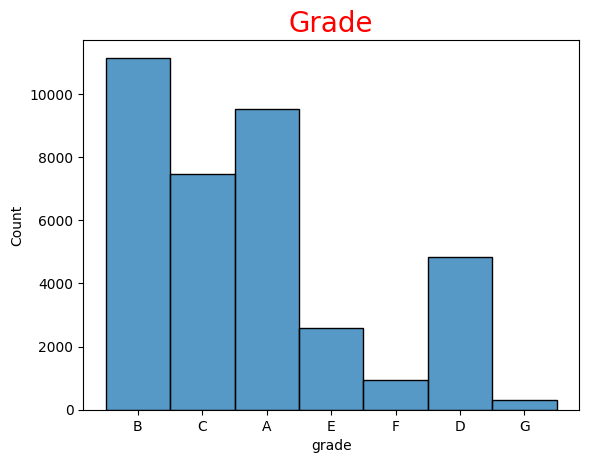

In [183]:
## From the graph, we can observe that in total of approved loans, around 1/7th are charged off.
### Plot for grade to observe 
sns.histplot(loan_club.grade)
plt.title("Grade", color = 'red',fontsize= 20)

In [63]:
## Analyse grade column
loan_club.grade.value_counts()

grade
B    11148
A     9511
C     7470
D     4851
E     2574
F      939
G      294
Name: count, dtype: int64

In [64]:
### Analyse emp_length column
loan_club.emp_length.value_counts()

emp_length
10+ years    8363
< 1 year     4329
2 years      4201
3 years      3946
4 years      3290
5 years      3156
1 year       3069
6 years      2133
7 years      1685
8 years      1407
9 years      1208
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, '10+ years'),
  Text(1, 0, '< 1 year'),
  Text(2, 0, '3 years'),
  Text(3, 0, '8 years'),
  Text(4, 0, '9 years'),
  Text(5, 0, '4 years'),
  Text(6, 0, '5 years'),
  Text(7, 0, '1 year'),
  Text(8, 0, '6 years'),
  Text(9, 0, '2 years'),
  Text(10, 0, '7 years')])

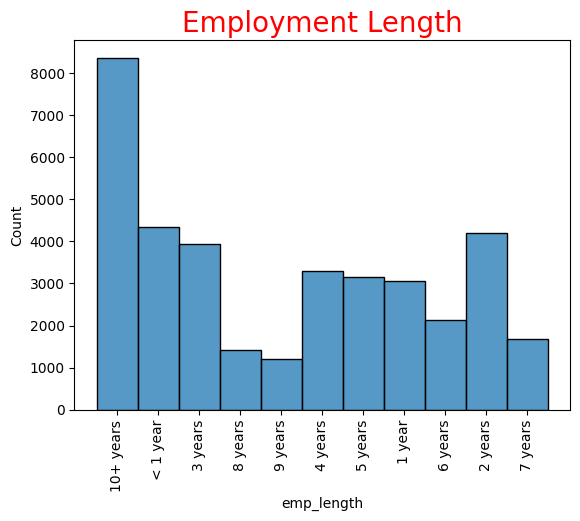

In [184]:
sns.histplot(loan_club.emp_length)
plt.title("Employment Length",color = 'red', fontsize = 20)
plt.xticks(rotation = 90)

In [66]:
## There are more people with more than 10 years experience in approved loans.
# Analyse Verification_status
loan_club.verification_status.value_counts()

verification_status
Not Verified       15548
Verified           11761
Source Verified     9478
Name: count, dtype: int64

In [67]:
## We can observe that there are more number of loans approved without verification process.
# Analyse home_ownership column
loan_club.home_ownership.value_counts()

home_ownership
RENT        17665
MORTGAGE    16324
OWN          2702
OTHER          96
Name: count, dtype: int64

Text(0.5, 1.0, 'Purpose of Loans')

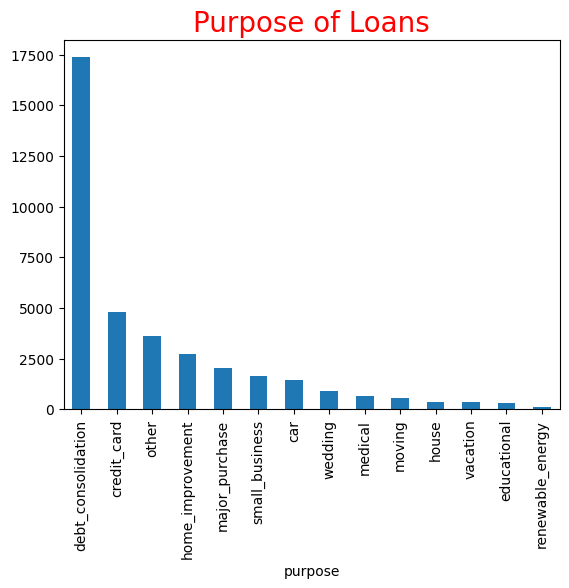

In [186]:
## Observation is that many people who take loans live on either rent or on Mortgage. 
# Understand about the Purpose for taking loans
loan_club.purpose.value_counts()
loan_club.purpose.value_counts().plot.bar()
plt.title("Purpose of Loans", color = 'red', fontsize = 20)

In [69]:
# Here, we can understand that loans are taken merely for debt_consolidation purpose.
# Addr_state - Understand how this affect Loan
loan_club.addr_state.value_counts()

addr_state
CA    6676
NY    3509
FL    2641
TX    2554
NJ    1729
IL    1429
PA    1424
VA    1306
GA    1294
MA    1229
OH    1126
MD     976
AZ     791
WA     760
CO     720
CT     696
NC     694
MI     661
MO     639
MN     574
NV     460
SC     443
OR     414
AL     410
WI     408
LA     407
KY     305
OK     281
KS     241
UT     241
AR     223
DC     206
RI     190
NM     172
WV     164
HI     160
NH     154
DE     107
MT      77
AK      75
WY      75
SD      59
VT      51
MS      19
TN      10
ID       4
IA       1
NE       1
IN       1
Name: count, dtype: int64

<Axes: xlabel='addr_state', ylabel='Count'>

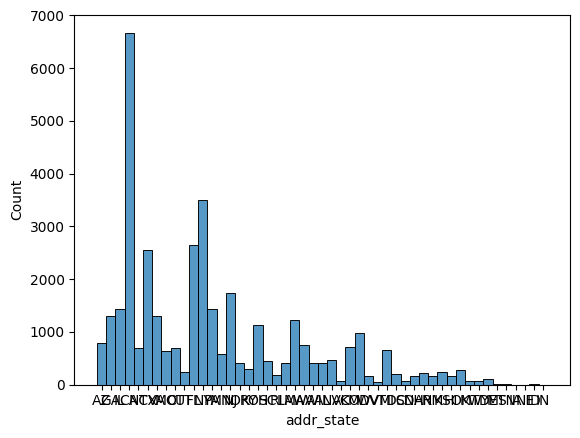

In [70]:
sns.histplot(loan_club.addr_state)

In [71]:
## From this we can observe that there are more people taking loans from State CA and least from IA, NE and IN

### BiVariate Analysis

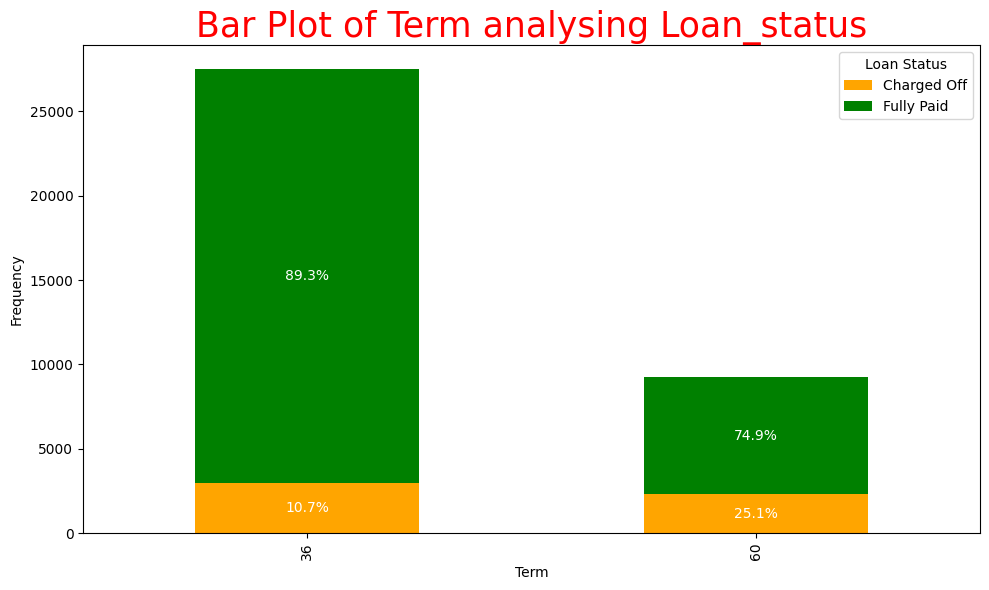

In [72]:
## Now we will try to compare each variable with loan status and see how they are affecting Loan_status of an application.
# Analysing term with Loan_status

grouped = loan_club.groupby(['term', 'loan_status']).size().unstack(fill_value=0)

# Plot stacked bar chart with actual frequencies
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['orange', 'green'])

# Add title and labels
plt.title('Bar Plot of Term analysing Loan_status', color='red', size=25)
plt.xlabel('Term') 
plt.ylabel('Frequency')

# Add percentage annotations on each stack
for i, term in enumerate(grouped.index):
    total = grouped.loc[term].sum()  # Total for this term
    bottom = 0  # Bottom of the stack
    for loan_status in grouped.columns:
        value = grouped.loc[term, loan_status]
        percentage = (value / total) * 100 if total > 0 else 0
        plt.text(
            i,  # Bar position
            bottom + value / 2,  # Center of the current stack
            f'{percentage:.1f}%',  # Percentage text
            ha='center', va='center', color='white', fontsize=10
        )
        bottom += value  

plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

In [73]:
### Quantities for Term with respect to loan_status
grouped

loan_status  Charged Off  Fully Paid
term                                
36                  2943       24595
60                  2322        6927

In [74]:
### Here we can observe that if the term is 36 months, there is only 10.7% charged off loans, but if 60 months, ther is 25.1% charged off loans.
# we can recommend now that approving loans with short term 36 months can reduce the risk of loan defaulters.


In [75]:
### Analysing variable Loan_amount for defaulters.
grouped = loan_club.groupby(['loan_amnt_sub', 'loan_status']).size().unstack(fill_value=0)
grouped


loan_status    Charged Off  Fully Paid
loan_amnt_sub                         
0-5K                  1186        7634
10K-15K                998        6433
15K-20K                718        3478
20K-25K                510        2233
25K-30K                142         550
30K-35K                174         546
5K-10K                1537       10648

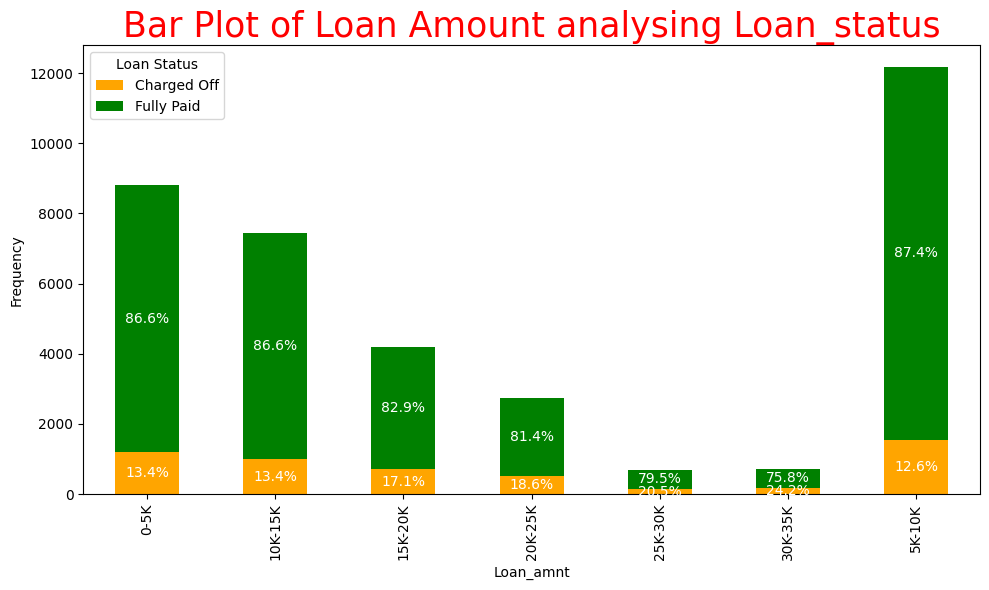

In [76]:
# Plotting Stacked Bar Chart to understand the effect of loan_amnt_sub on loan_status
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['orange', 'green'])

# Add title and labels
plt.title('Bar Plot of Loan Amount analysing Loan_status', color='red', size=25)
plt.xlabel('Loan_amnt') 
plt.ylabel('Frequency')

# Add percentage annotations on each stack
for i, loan_amnt_sub in enumerate(grouped.index):
    total = grouped.loc[loan_amnt_sub].sum()  # Total for this Loan_amnt
    bottom = 0  # Bottom of the stack
    for loan_status in grouped.columns:
        value = grouped.loc[loan_amnt_sub, loan_status]
        percentage = (value / total)* 100 if total > 0 else 0
        plt.text(
            i,  # Bar position
            bottom + value / 2,  # Center of the current stack
            f'{percentage:.1f}%',  # Percentage text
            ha='center', va='center', color='white', fontsize=10
        )
        bottom += value  

plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

In [77]:
### Here, we can conclude that if loan amount is more, then there is high chances of being defaulters.


In [78]:
## Analysing Interest rate for understanding Loan_status
grouped = loan_club.groupby(['int_rate_sub', 'loan_status']).size().unstack(fill_value=0)
grouped

loan_status   Charged Off  Fully Paid
int_rate_sub                         
10-15%               2511       14959
15-20%               1729        5292
20-25%                289         469
5-10%                 736       10802

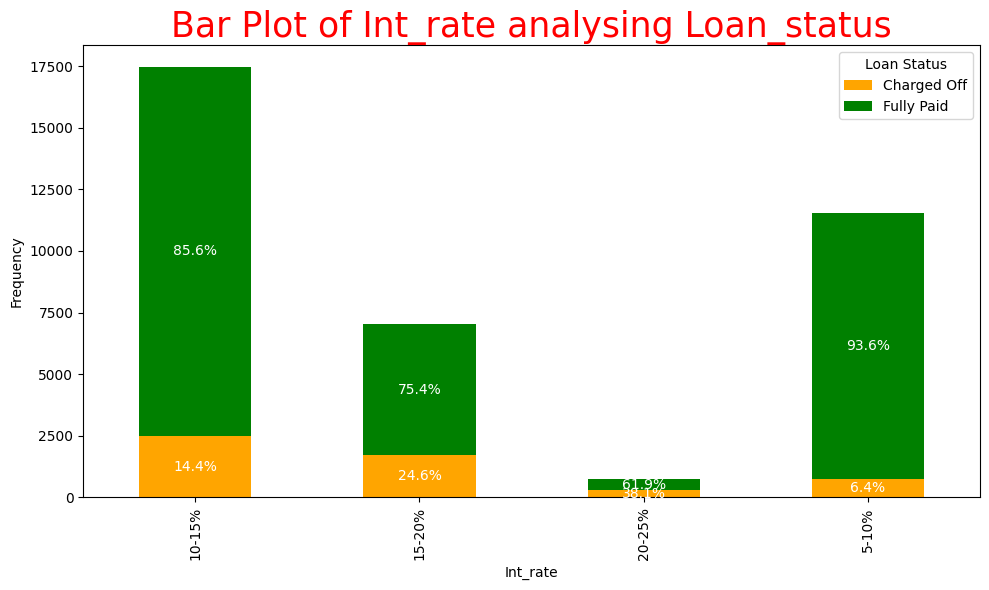

In [79]:
# Plotting Stacked Bar Chart to understand the effect of int_rate on loan_status
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['orange', 'green'])

# Add title and labels
plt.title('Bar Plot of Int_rate analysing Loan_status', color='red', size=25)
plt.xlabel('Int_rate') 
plt.ylabel('Frequency')

# Add percentage annotations on each stack
for i, int_rate_sub in enumerate(grouped.index):
    total = grouped.loc[int_rate_sub].sum()  # Total for this int_rate
    bottom = 0  # Bottom of the stack
    for loan_status in grouped.columns:
        value = grouped.loc[int_rate_sub, loan_status]
        percentage = (value / total)* 100 if total > 0 else 0
        plt.text(
            i,  # Bar position
            bottom + value / 2,  # Center of the current stack
            f'{percentage:.1f}%',  # Percentage text
            ha='center', va='center', color='white', fontsize=10
        )
        bottom += value  

plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

In [80]:
### From the bar chart, we can infer that higher the interest rate higher is the amount of defaulters. 
# We can strongly tell that Loan_status is directly proportional to Int_rate.

In [81]:
## Analysing Grade for understanding Loan_status
grouped = loan_club.groupby(['grade', 'loan_status']).size().unstack(fill_value=0)
grouped

loan_status  Charged Off  Fully Paid
grade                               
A                    552        8959
B                   1326        9822
C                   1250        6220
D                   1049        3802
E                    686        1888
F                    304         635
G                     98         196

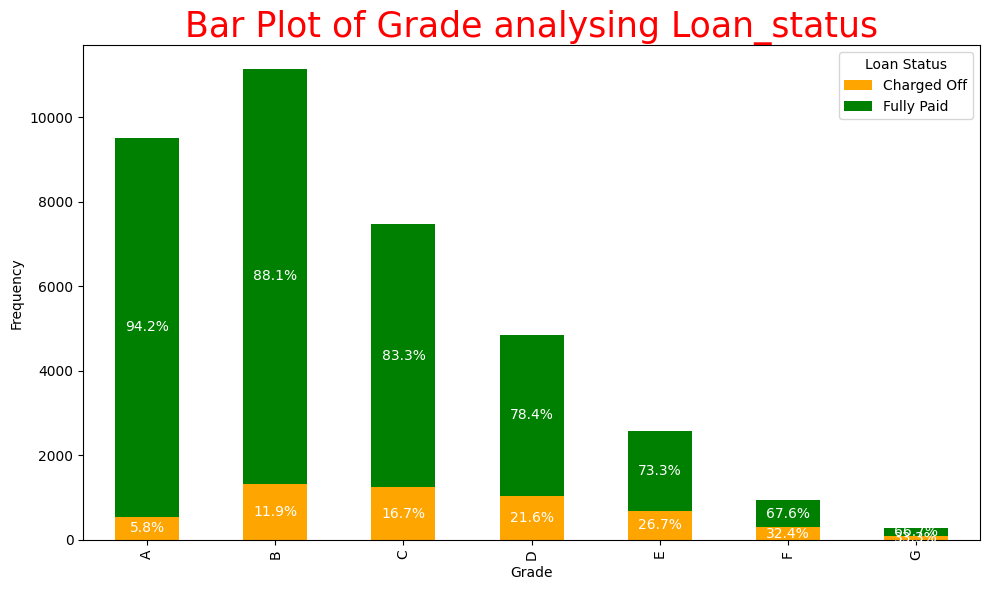

In [82]:
# Plotting Stacked Bar Chart to understand the effect of int_rate on loan_status
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['orange', 'green'])

# Add title and labels
plt.title('Bar Plot of Grade analysing Loan_status', color='red', size=25)
plt.xlabel('Grade') 
plt.ylabel('Frequency')

# Add percentage annotations on each stack
for i, grade in enumerate(grouped.index):
    total = grouped.loc[grade].sum()  # Total for this grade
    bottom = 0  # Bottom of the stack
    for loan_status in grouped.columns:
        value = grouped.loc[grade, loan_status]
        percentage = (value / total)* 100 if total > 0 else 0
        plt.text(
            i,  # Bar position
            bottom + value / 2,  # Center of the current stack
            f'{percentage:.1f}%',  # Percentage text
            ha='center', va='center', color='white', fontsize=10
        )
        bottom += value  

plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

In [83]:
### From the graph, we can understand that if Grade is considered increasing in alphabetical order, defaulters are also increasing in the same way.
# It is understandable that loans with lower grade have less chances of defaulting, while with higher grade - defaulters are also higher.

In [84]:
## Analysing Emp_length for understanding Loan_status
grouped = loan_club.groupby(['emp_length', 'loan_status']).size().unstack(fill_value=0)
grouped

loan_status  Charged Off  Fully Paid
emp_length                          
1 year               439        2630
10+ years           1302        7061
2 years              554        3647
3 years              549        3397
4 years              448        2842
5 years              453        2703
6 years              299        1834
7 years              258        1427
8 years              199        1208
9 years              156        1052
< 1 year             608        3721

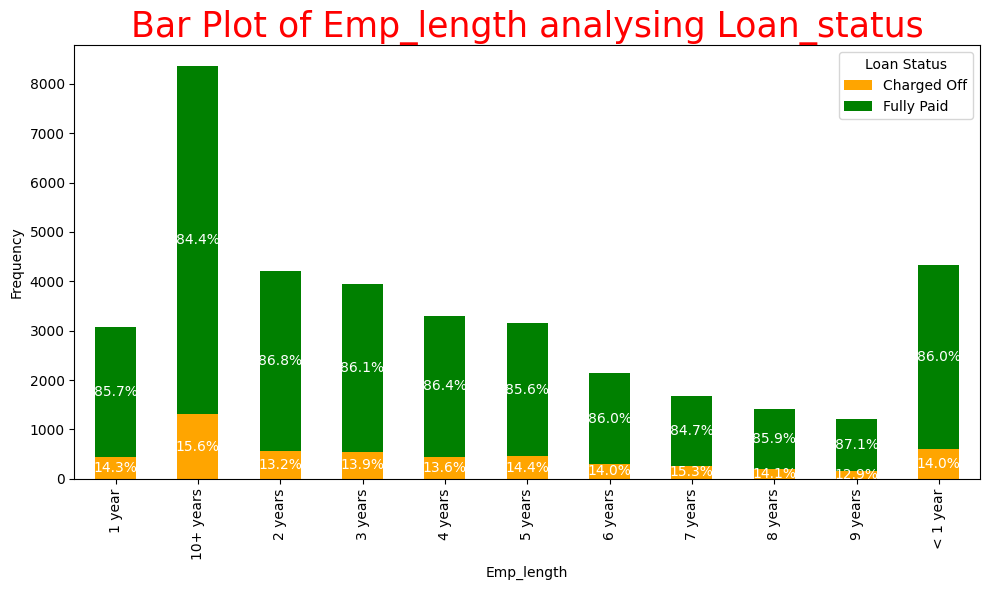

In [85]:
# Plotting Stacked Bar Chart to understand the effect of emp_length on loan_status
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['orange', 'green'])

# Add title and labels
plt.title('Bar Plot of Emp_length analysing Loan_status', color='red', size=25)
plt.xlabel('Emp_length') 
plt.ylabel('Frequency')

# Add percentage annotations on each stack
for i, emp_length in enumerate(grouped.index):
    total = grouped.loc[emp_length].sum()  # Total for this emp_length
    bottom = 0  # Bottom of the stack
    for loan_status in grouped.columns:
        value = grouped.loc[emp_length, loan_status]
        percentage = (value / total)* 100 if total > 0 else 0
        plt.text(
            i,  # Bar position
            bottom + value / 2,  # Center of the current stack
            f'{percentage:.1f}%',  # Percentage text
            ha='center', va='center', color='white', fontsize=10
        )
        bottom += value  

plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

In [86]:
### From here, we can infer that defaulters are almost constant irrespective of Emp_length.
# This shows that emp_length has very less influence on Loan_status.

In [87]:
## Analysing home_ownership for understanding Loan_status
grouped = loan_club.groupby(['home_ownership', 'loan_status']).size().unstack(fill_value=0)
grouped

loan_status     Charged Off  Fully Paid
home_ownership                         
MORTGAGE               2195       14129
OTHER                    18          78
OWN                     385        2317
RENT                   2667       14998

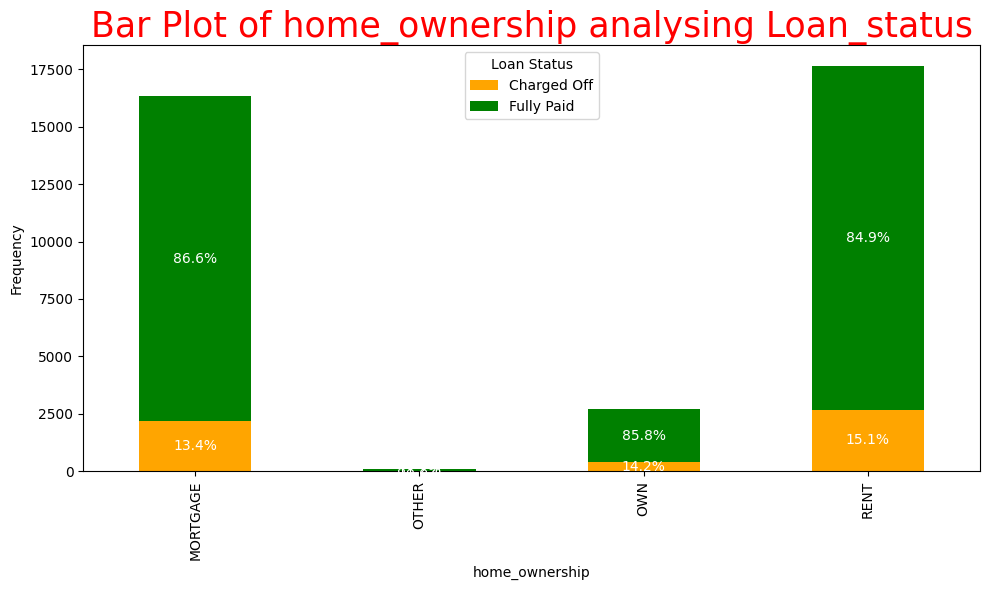

In [88]:
# Plotting Stacked Bar Chart to understand the effect of home_ownership on loan_status
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['orange', 'green'])

# Add title and labels
plt.title('Bar Plot of home_ownership analysing Loan_status', color='red', size=25)
plt.xlabel('home_ownership') 
plt.ylabel('Frequency')

# Add percentage annotations on each stack
for i, home_ownership in enumerate(grouped.index):
    total = grouped.loc[home_ownership].sum()  # Total for this home_ownership
    bottom = 0  # Bottom of the stack
    for loan_status in grouped.columns:
        value = grouped.loc[home_ownership, loan_status]
        percentage = (value / total)* 100 if total > 0 else 0
        plt.text(
            i,  # Bar position
            bottom + value / 2,  # Center of the current stack
            f'{percentage:.1f}%',  # Percentage text
            ha='center', va='center', color='white', fontsize=10
        )
        bottom += value  

plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

In [89]:
### From here, it can be understood that around 14% of defaulters are present irrespective of home ownership.
# This shows that home_ownership has less influence on why there are defaulters.


In [90]:
## Analysing annual Income for understanding Loan_status
grouped = loan_club.groupby(['annu_inc_sub', 'loan_status']).size().unstack(fill_value=0)
grouped

loan_status   Charged Off  Fully Paid
annu_inc_sub                         
100K - 200K           515        4270
200K+                  55         479
30K - 40K             838        4000
40K - 50K             811        4628
4K - 30K              729        3316
50K - 60K             836        4542
60K - 70K             529        3428
70K - 80K             443        2973
80K - 100K            509        3886

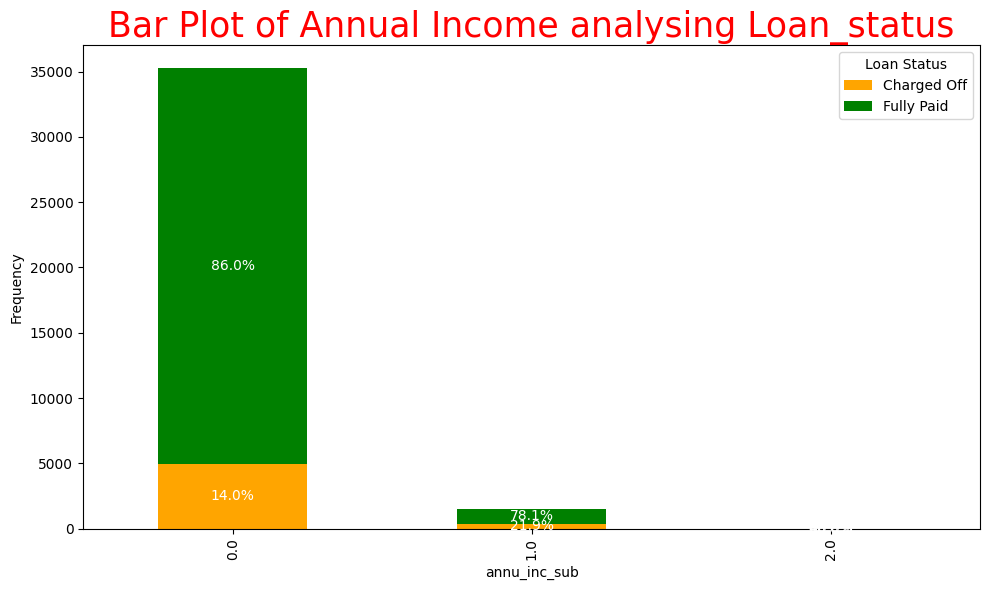

In [187]:
# Plotting Stacked Bar Chart to understand the effect of annu_inc_sub on loan_status
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['orange', 'green'])

# Add title and labels
plt.title('Bar Plot of Annual Income analysing Loan_status', color='red', size=25)
plt.xlabel('annu_inc_sub') 
plt.ylabel('Frequency')

# Add percentage annotations on each stack
for i, annu_inc_sub in enumerate(grouped.index):
    total = grouped.loc[annu_inc_sub].sum()  # Total for this annu_inc_sub
    bottom = 0  # Bottom of the stack
    for loan_status in grouped.columns:
        value = grouped.loc[annu_inc_sub, loan_status]
        percentage = (value / total)* 100 if total > 0 else 0
        plt.text(
            i,  # Bar position
            bottom + value / 2,  # Center of the current stack
            f'{percentage:.1f}%',  # Percentage text
            ha='center', va='center', color='white', fontsize=10
        )
        bottom += value  

plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

In [92]:
## This shows that higher the annual income, lesses the defaulters.
### This means Loan_status is inversely proportional to Annual Income.

In [93]:
## Analysing verification_status for understanding Loan_status
grouped = loan_club.groupby(['verification_status', 'loan_status']).size().unstack(fill_value=0)
grouped

loan_status          Charged Off  Fully Paid
verification_status                         
Not Verified                1924       13624
Source Verified             1393        8085
Verified                    1948        9813

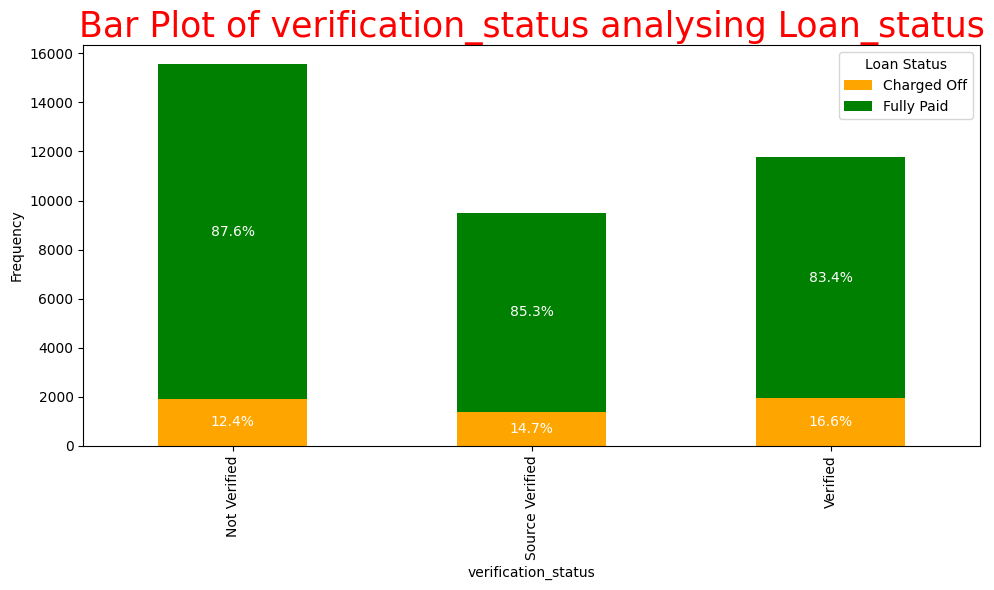

In [94]:
# Plotting Stacked Bar Chart to understand the effect of verification_status on loan_status
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['orange', 'green'])

# Add title and labels
plt.title('Bar Plot of verification_status analysing Loan_status', color='red', size=25)
plt.xlabel('verification_status') 
plt.ylabel('Frequency')

# Add percentage annotations on each stack
for i, verification_status in enumerate(grouped.index):
    total = grouped.loc[verification_status].sum()  # Total for this verification_status
    bottom = 0  # Bottom of the stack
    for loan_status in grouped.columns:
        value = grouped.loc[verification_status, loan_status]
        percentage = (value / total)* 100 if total > 0 else 0
        plt.text(
            i,  # Bar position
            bottom + value / 2,  # Center of the current stack
            f'{percentage:.1f}%',  # Percentage text
            ha='center', va='center', color='white', fontsize=10
        )
        bottom += value  

plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

In [95]:
### From this, we can infer that if Verfication status is verified, there are more defaulters compared to Source Verified and Not verified.
# But the difference is significantly low, this means Verification status has minimum effect on Loan_status.

In [96]:
## Analysing Issue_d to understand the effect on Loan_status.
# We will do this in 2 parts as year and Month seperately to infer better. 
## With respect to Year
loan_club['issue_d']=pd.to_datetime(loan_club['issue_d'], format='%b-%y')
loan_club['Issue_Year'] = pd.DatetimeIndex(loan_club['issue_d']).year
loan_club['Issue_Month'] = pd.DatetimeIndex(loan_club['issue_d']).month




In [97]:
grouped = loan_club.groupby(['Issue_Year', 'loan_status']).size().unstack(fill_value=0)
grouped

loan_status  Charged Off  Fully Paid
Issue_Year                          
2007                   2           5
2008                 169         935
2009                 590        4106
2010                1406        9783
2011                3098       16693

In [98]:
# With respect to Month
grouped1 = loan_club.groupby(['Issue_Month', 'loan_status']).size().unstack(fill_value=0)
grouped1

loan_status  Charged Off  Fully Paid
Issue_Month                         
1                    281        1879
2                    243        1866
3                    314        2195
4                    355        2399
5                    444        2391
6                    456        2627
7                    460        2756
8                    446        2838
9                    523        2848
10                   544        3042
11                   562        3286
12                   637        3395

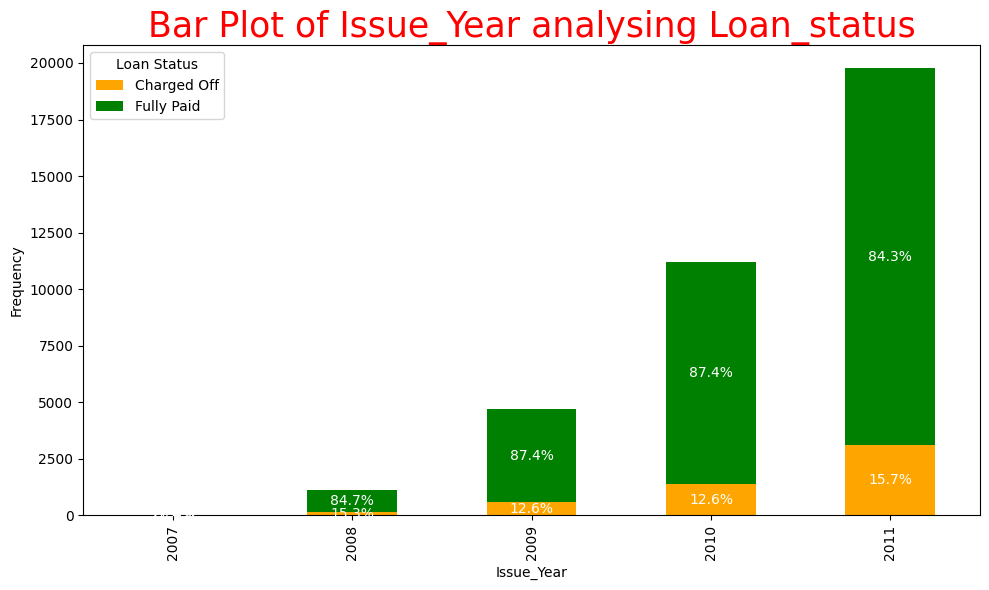

In [99]:
# Plotting Stacked Bar Chart to understand the effect of Issue_Year on loan_status
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['orange', 'green'])

# Add title and labels
plt.title('Bar Plot of Issue_Year analysing Loan_status', color='red', size=25)
plt.xlabel('Issue_Year') 
plt.ylabel('Frequency')

# Add percentage annotations on each stack
for i, Issue_Year in enumerate(grouped.index):
    total = grouped.loc[Issue_Year].sum()  # Total for this Issue_Year
    bottom = 0  # Bottom of the stack
    for loan_status in grouped.columns:
        value = grouped.loc[Issue_Year, loan_status]
        percentage = (value / total)* 100 if total > 0 else 0
        plt.text(
            i,  # Bar position
            bottom + value / 2,  # Center of the current stack
            f'{percentage:.1f}%',  # Percentage text
            ha='center', va='center', color='white', fontsize=10
        )
        bottom += value  

plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

In [100]:
### From the graph, we infer that number of defaulters is almost similar in every year.
# It is safe to assume that Year does not have much influence.

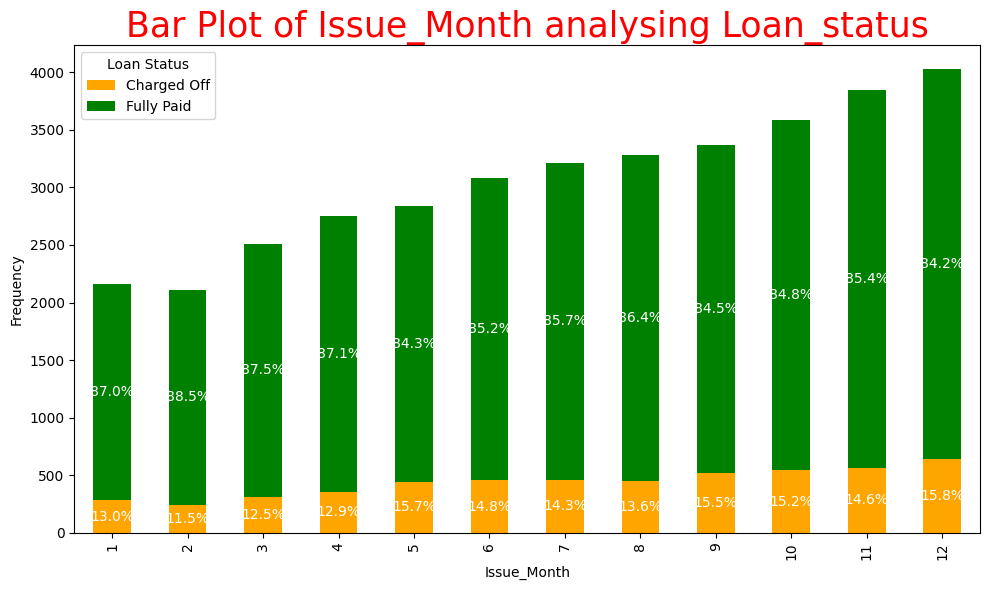

In [101]:
# Plotting Stacked Bar Chart to understand the effect of Issue_Month on loan_status
ax = grouped1.plot(kind='bar', stacked=True, figsize=(10, 6), color=['orange', 'green'])

# Add title and labels
plt.title('Bar Plot of Issue_Month analysing Loan_status', color='red', size=25)
plt.xlabel('Issue_Month') 
plt.ylabel('Frequency')

# Add percentage annotations on each stack
for i, Issue_Month in enumerate(grouped1.index):
    total = grouped1.loc[Issue_Month].sum()  # Total for this Issue_Month
    bottom = 0  # Bottom of the stack
    for loan_status in grouped.columns:
        value = grouped1.loc[Issue_Month, loan_status]
        percentage = (value / total)* 100 if total > 0 else 0
        plt.text(
            i,  # Bar position
            bottom + value / 2,  # Center of the current stack
            f'{percentage:.1f}%',  # Percentage text
            ha='center', va='center', color='white', fontsize=10
        )
        bottom += value  

plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

In [102]:
### From the gragh, we can infer that from January - April defaulters are less when compared to other months. 
# Also, we can understand at the end of year, from september - December there are more number of defaulters. 
# This we can recommend that defaulters will be less when loans are approved in the beginning of year, but in the end this difference is not much. 

In [103]:
## Analysing Purpose for understanding Loan_status
grouped = loan_club.groupby(['purpose', 'loan_status']).size().unstack(fill_value=0)
grouped

loan_status         Charged Off  Fully Paid
purpose                                    
car                         151        1278
credit_card                 501        4297
debt_consolidation         2622       14745
educational                  49         247
home_improvement            319        2413
house                        58         291
major_purchase              206        1847
medical                      99         546
moving                       81         460
other                       578        3015
renewable_energy             18          76
small_business              444        1212
vacation                     50         291
wedding                      89         804

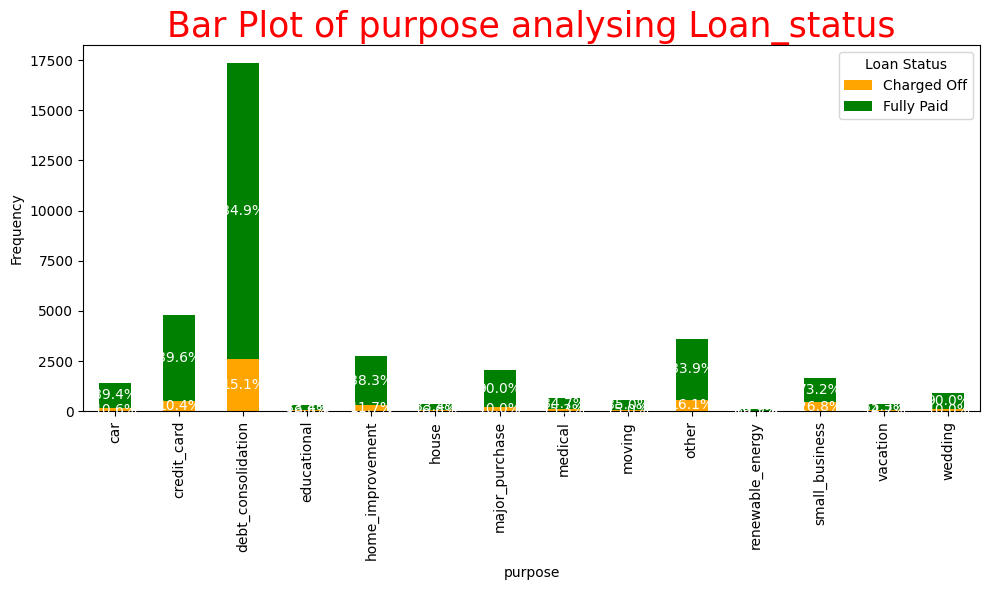

In [104]:
# Plotting Stacked Bar Chart to understand the effect of Purpose on loan_status
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['orange', 'green'])

# Add title and labels
plt.title('Bar Plot of purpose analysing Loan_status', color='red', size=25)
plt.xlabel('purpose') 
plt.ylabel('Frequency')

# Add percentage annotations on each stack
for i, purpose in enumerate(grouped.index):
    total = grouped.loc[purpose].sum()  # Total for this purpose
    bottom = 0  # Bottom of the stack
    for loan_status in grouped.columns:
        value = grouped.loc[purpose, loan_status]
        percentage = (value / total)* 100 if total > 0 else 0
        plt.text(
            i,  # Bar position
            bottom + value / 2,  # Center of the current stack
            f'{percentage:.1f}%',  # Percentage text
            ha='center', va='center', color='white', fontsize=10
        )
        bottom += value  

plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

In [105]:
### From here, we can understand that people who take loans on Small_business and renewable_energy will default the most. 

In [106]:
## Analysing addr_state for understanding Loan_status
grouped = loan_club.groupby(['addr_state', 'loan_status']).size().unstack(fill_value=0)
grouped

loan_status  Charged Off  Fully Paid
addr_state                          
AK                    15          60
AL                    50         360
AR                    26         197
AZ                   113         678
CA                  1050        5626
CO                    87         633
CT                    87         609
DC                    14         192
DE                    11          96
FL                   462        2179
GA                   202        1092
HI                    28         132
IA                     0           1
ID                     0           4
IL                   191        1238
IN                     0           1
KS                    26         215
KY                    45         260
LA                    52         355
MA                   147        1082
MD                   151         825
MI                    94         567
MN                    76         498
MO                   105         534
MS                     2          17
MT                    10          67
NC                   103         591
NE                     0           1
NH                    23         131
NJ                   269        1460
NM                    29         143
NV                   101         359
NY                   462        3047
OH                   144         982
OK                    39         242
OR                    68         346
PA                   167        1257
RI                    25         165
SC                    64         379
SD                    11          48
TN                     2           8
TX                   303        2251
UT                    37         204
VA                   170        1136
VT                     6          45
WA                   116         644
WI                    58         350
WV                    21         143
WY                     3          72

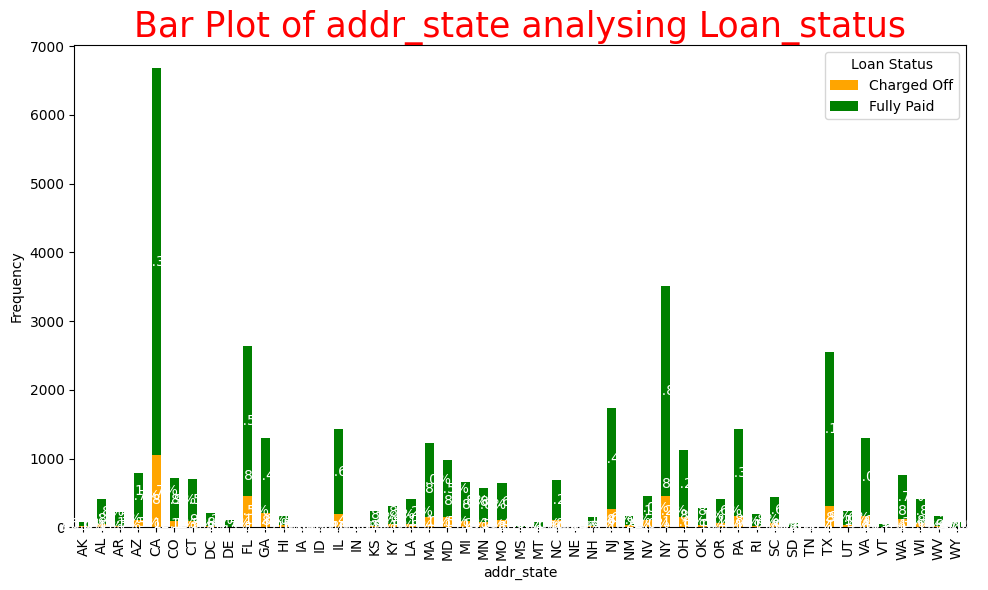

In [107]:
# Plotting Stacked Bar Chart to understand the effect of addr_state on loan_status
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['orange', 'green'])

# Add title and labels
plt.title('Bar Plot of addr_state analysing Loan_status', color='red', size=25)
plt.xlabel('addr_state') 
plt.ylabel('Frequency')

# Add percentage annotations on each stack
for i, addr_state in enumerate(grouped.index):
    total = grouped.loc[addr_state].sum()  # Total for this addr_state
    bottom = 0  # Bottom of the stack
    for loan_status in grouped.columns:
        value = grouped.loc[addr_state, loan_status]
        percentage = (value / total)* 100 if total > 0 else 0
        plt.text(
            i,  # Bar position
            bottom + value / 2,  # Center of the current stack
            f'{percentage:.1f}%',  # Percentage text
            ha='center', va='center', color='white', fontsize=10
        )
        bottom += value  

plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

In [108]:
## From here, we can understand that there are more people from CA who defaulted much. 
# And this change doesn't affect much I understand as the proportion of people who takes loans form each state is different and it doesnt matter much.

In [109]:
## Analysing dti_sub for understanding Loan_status
grouped = loan_club.groupby(['dti_sub', 'loan_status']).size().unstack(fill_value=0)
grouped

loan_status  Charged Off  Fully Paid
dti_sub                             
0 - 5                579        4120
10 - 15             1315        7913
15 - 20             1309        7141
20 - 25             1048        5279
25 - 30               79         517
5 - 10               935        6552

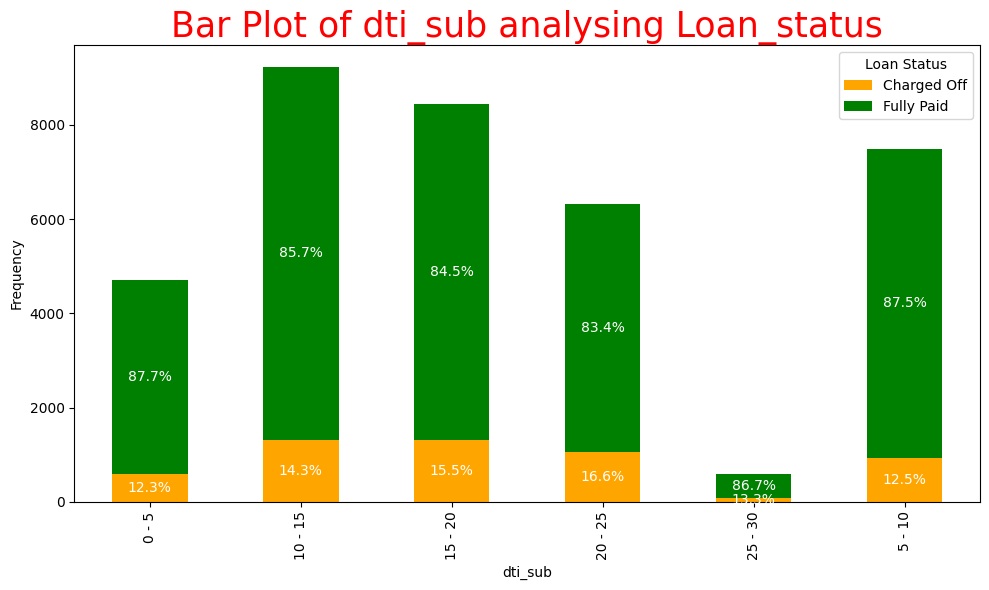

In [110]:
# Plotting Stacked Bar Chart to understand the effect of dti_sub on loan_status
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['orange', 'green'])

# Add title and labels
plt.title('Bar Plot of dti_sub analysing Loan_status', color='red', size=25)
plt.xlabel('dti_sub') 
plt.ylabel('Frequency')

# Add percentage annotations on each stack
for i, dti_sub in enumerate(grouped.index):
    total = grouped.loc[dti_sub].sum()  # Total for this dti_sub
    bottom = 0  # Bottom of the stack
    for loan_status in grouped.columns:
        value = grouped.loc[dti_sub, loan_status]
        percentage = (value / total)* 100 if total > 0 else 0
        plt.text(
            i,  # Bar position
            bottom + value / 2,  # Center of the current stack
            f'{percentage:.1f}%',  # Percentage text
            ha='center', va='center', color='white', fontsize=10
        )
        bottom += value  

plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

In [111]:
### This infers that if DTI is more, defaulters are also more and if dti is less, defaulters are less.
# This shows that DTI is directly proportional to loan_status

In [112]:
## Analysing open_acc for understanding Loan_status
grouped = loan_club.groupby(['open_acc', 'loan_status']).size().unstack(fill_value=0)
grouped

loan_status  Charged Off  Fully Paid
open_acc                            
2                    110         404
3                    228        1138
4                    333        1829
5                    386        2549
6                    512        3156
7                    525        3228
8                    508        3143
9                    487        2973
10                   438        2532
11                   365        2197
12                   290        1837
13                   250        1521
14                   205        1159
15                   161         940
16                   100         779
17                    97         581
18                    66         434
19                    58         316
20                    40         229
21                    34         190
22                    15         113
23                    12          76
24                     7          61
25                    11          41
26                     6          23
27                     5          16
28                     5          18
29                     1          12
30                     3          11
31                     2           3
32                     0           2
33                     2           1
34                     1           4
35                     1           2
36                     0           2
38                     1           0
39                     0           1
44                     0           1

In [113]:
## This shows that there is no much influence of open_acc on loan_status.
# From this I can infer that we can remove open_acc and total_acc from data set for easier analysis.
loan_club = loan_club.drop(['open_acc','total_acc'], axis = 1)
loan_club.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'pub_rec', 'pub_rec_bankruptcies', 'loan_amnt_sub',
       'int_rate_sub', 'annu_inc_sub', 'dti_sub', 'Issue_Year', 'Issue_Month'],
      dtype='object')

In [114]:
## Analysing pub_rec for understanding Loan_status
grouped = loan_club.groupby(['pub_rec', 'loan_status']).size().unstack(fill_value=0)
grouped

loan_status  Charged Off  Fully Paid
pub_rec                             
0                   4837       30021
1                    418        1457
2                     10          35
3                      0           7
4                      0           2

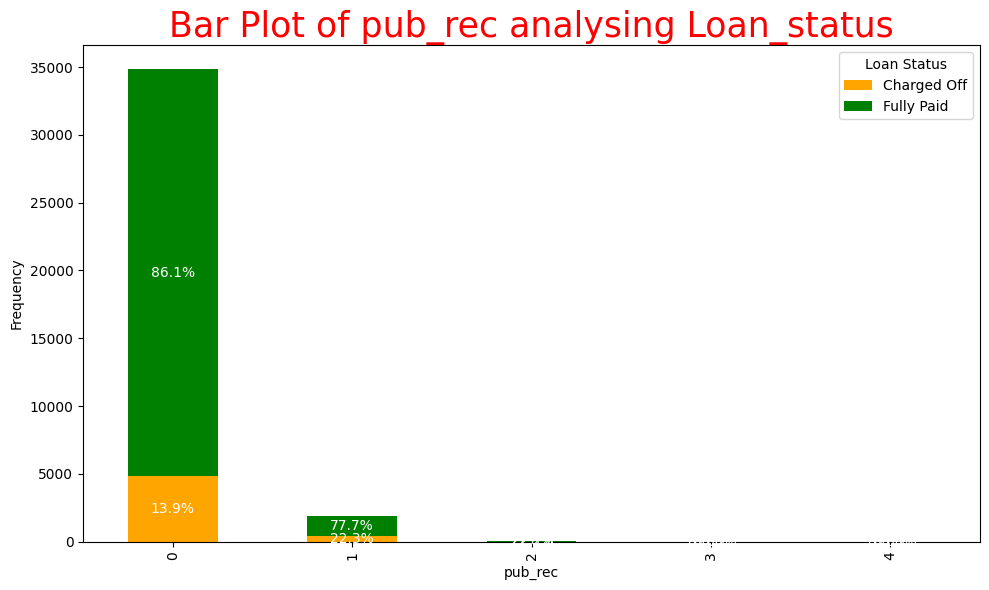

In [115]:
# Plotting Stacked Bar Chart to understand the effect of pub_rec on loan_status
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['orange', 'green'])

# Add title and labels
plt.title('Bar Plot of pub_rec analysing Loan_status', color='red', size=25)
plt.xlabel('pub_rec') 
plt.ylabel('Frequency')

# Add percentage annotations on each stack
for i, pub_rec in enumerate(grouped.index):
    total = grouped.loc[pub_rec].sum()  # Total for this pub_rec
    bottom = 0  # Bottom of the stack
    for loan_status in grouped.columns:
        value = grouped.loc[pub_rec, loan_status]
        percentage = (value / total)* 100 if total > 0 else 0
        plt.text(
            i,  # Bar position
            bottom + value / 2,  # Center of the current stack
            f'{percentage:.1f}%',  # Percentage text
            ha='center', va='center', color='white', fontsize=10
        )
        bottom += value  

plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

In [116]:
### From here, We can infer that people with 1 pub_rec have more defaulters when compared to others. 


In [117]:
## Analysing pub_rec_bankruptcies for understanding Loan_status
grouped = loan_club.groupby(['pub_rec_bankruptcies', 'loan_status']).size().unstack(fill_value=0)
grouped

loan_status           Charged Off  Fully Paid
pub_rec_bankruptcies                         
0.0                          4928       30325
1.0                           335        1194
2.0                             2           3

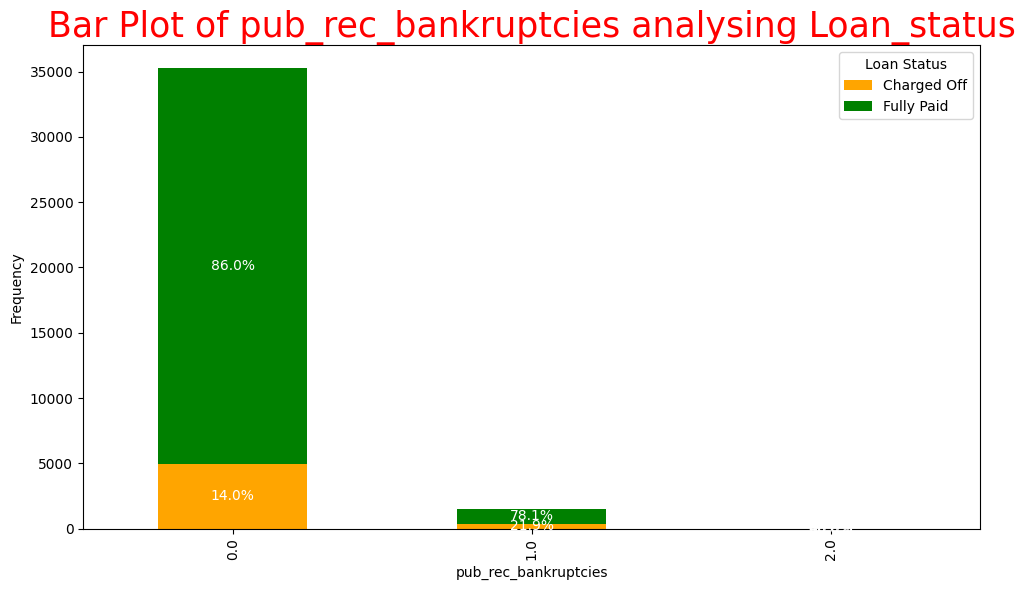

In [118]:
# Plotting Stacked Bar Chart to understand the effect of pub_rec_bankruptcies on loan_status
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['orange', 'green'])

# Add title and labels
plt.title('Bar Plot of pub_rec_bankruptcies analysing Loan_status', color='red', size=25)
plt.xlabel('pub_rec_bankruptcies') 
plt.ylabel('Frequency')

# Add percentage annotations on each stack
for i, pub_rec_bankruptcies in enumerate(grouped.index):
    total = grouped.loc[pub_rec_bankruptcies].sum()  # Total for this pub_rec_bankruptcies
    bottom = 0  # Bottom of the stack
    for loan_status in grouped.columns:
        value = grouped.loc[pub_rec_bankruptcies, loan_status]
        percentage = (value / total)* 100 if total > 0 else 0
        plt.text(
            i,  # Bar position
            bottom + value / 2,  # Center of the current stack
            f'{percentage:.1f}%',  # Percentage text
            ha='center', va='center', color='white', fontsize=10
        )
        bottom += value  

plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

In [119]:
## From here, we can infer that defaulters increase when pub_rec_bankruptcies are more. 
# It is directly Proportional.


### Findings from Bivariate Analysis for Loan_status

In [120]:
## if the term is 36 months, there is only 10.7% charged off loans,
# but if 60 months, ther is 25.1% charged off loans
## if loan amount is more, then there is high chances of being defaulters.
## if higher the interest rate higher is the amount of defaulters, Loan_status is directly proportional to Int_rate. 
## loans with lower grade have less chances of defaulting, while with higher grade - defaulters are also higher
## emp_length has very less influence on Loan_status
## home_ownership has less influence on why there are defaulters.
## Loan_status is inversely proportional to Annual Income.
## Verification status has minimum effect on Loan_status.
## Year does not have much influence.
## defaulters will be less when loans are approved in the beginning of year, but in the end this difference is not much. 
## loans on Small_business and renewable_energy will default the most. 
## DTI is directly proportional to loan_status
## people with 1 pub_rec have more defaulters when compared to others
## Loan_status is directly proportional to pub_rec-bankruptcies.

### Bivariate Analysis between different Columns other than Loan_status

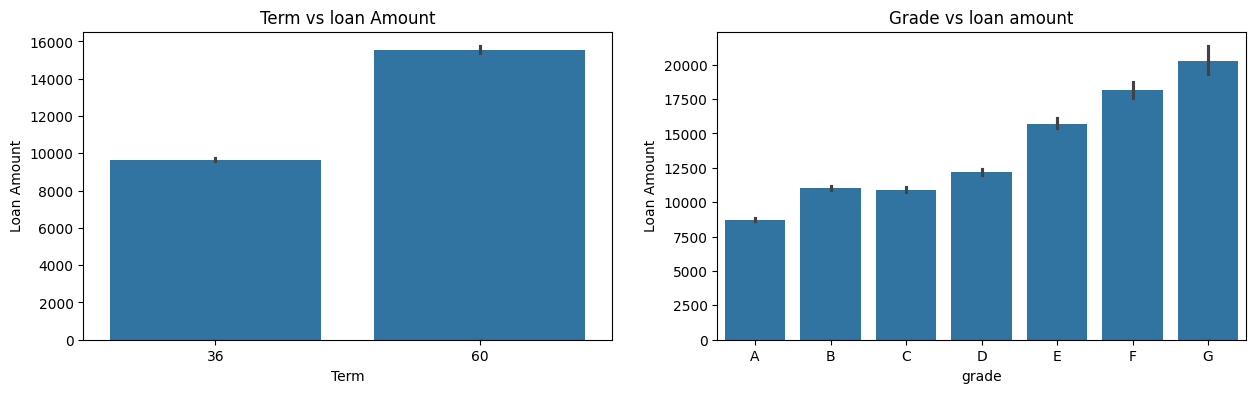

In [121]:
## Analysing Loan_amount with respect to other variables.
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.barplot(x="term", y="loan_amnt", data=loan_club)
plt.title("Term vs loan Amount")
plt.xlabel('Term')
plt.ylabel('Loan Amount')
plt.subplot(1,2,2)
sns.barplot(x="grade", y="loan_amnt", data=loan_club, order=['A','B','C','D','E','F','G'])
plt.title("Grade vs loan amount")
plt.xlabel('grade')
plt.ylabel('Loan Amount')
plt.show()

In [122]:
### These barplots show that Term is directly proportional to Loan Amount.
# From this we understand that if loan amount is more, term is also more. 
### Also Grade is directly proportional to Loan Amount.

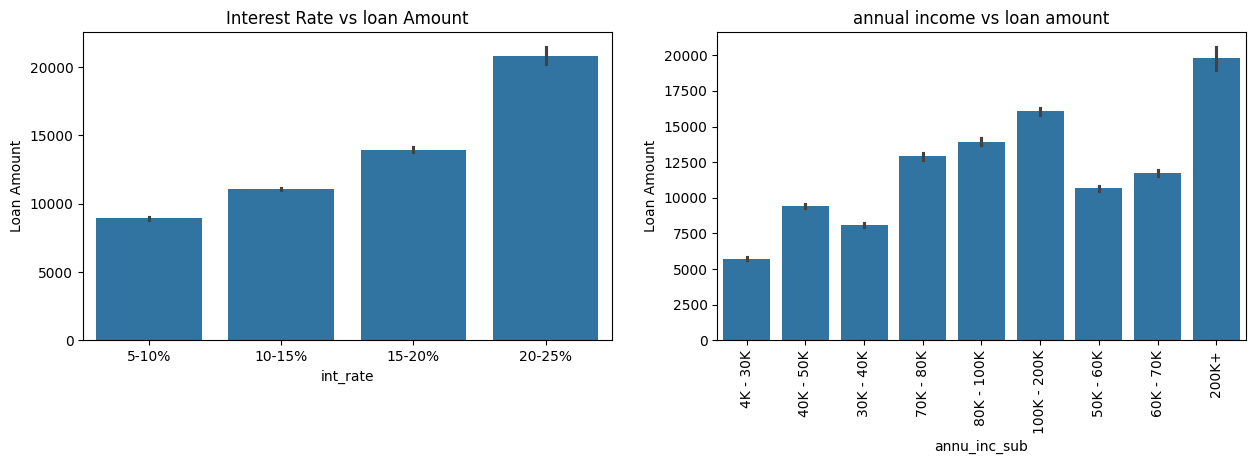

In [123]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.barplot(x="int_rate_sub", y="loan_amnt", data=loan_club, order=['5-10%','10-15%','15-20%','20-25%'])
plt.title("Interest Rate vs loan Amount")
plt.xlabel('int_rate')
plt.ylabel('Loan Amount')
plt.subplot(1,2,2)
sns.barplot(x="annu_inc_sub", y="loan_amnt", data=loan_club)
plt.title("annual income vs loan amount")
plt.xlabel('annu_inc_sub')
plt.ylabel('Loan Amount')
plt.xticks(rotation=90)
plt.show()

In [124]:
## From here, we can infer that
# Interest rate is directly proportional to Loan Amount.
# Annual Income is directly proportional to Loan Amount.


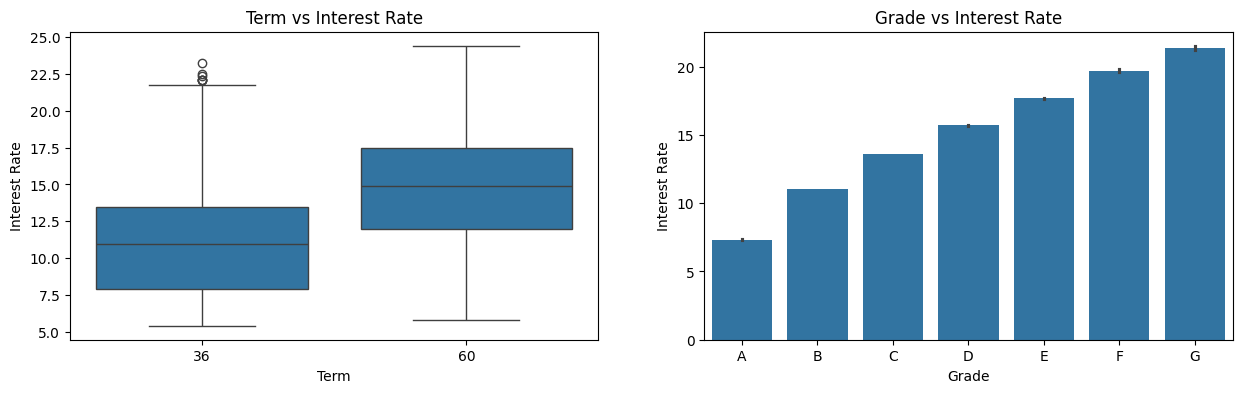

In [125]:
### Checking how int_rate is affected with other variables.
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="term", y="int_rate", data=loan_club)
plt.title("Term vs Interest Rate")
plt.xlabel('Term')
plt.ylabel('Interest Rate')
plt.subplot(1,2,2)
sns.barplot(x="grade", y="int_rate", data=loan_club,order=['A','B','C','D','E','F','G'])
plt.title("Grade vs Interest Rate")
plt.xlabel('Grade')
plt.ylabel('Interest Rate')
plt.show()

In [126]:
### Here, Interest Rate is directly Proportional to Term.
# Interest Rate is directly Proportional to Grade.


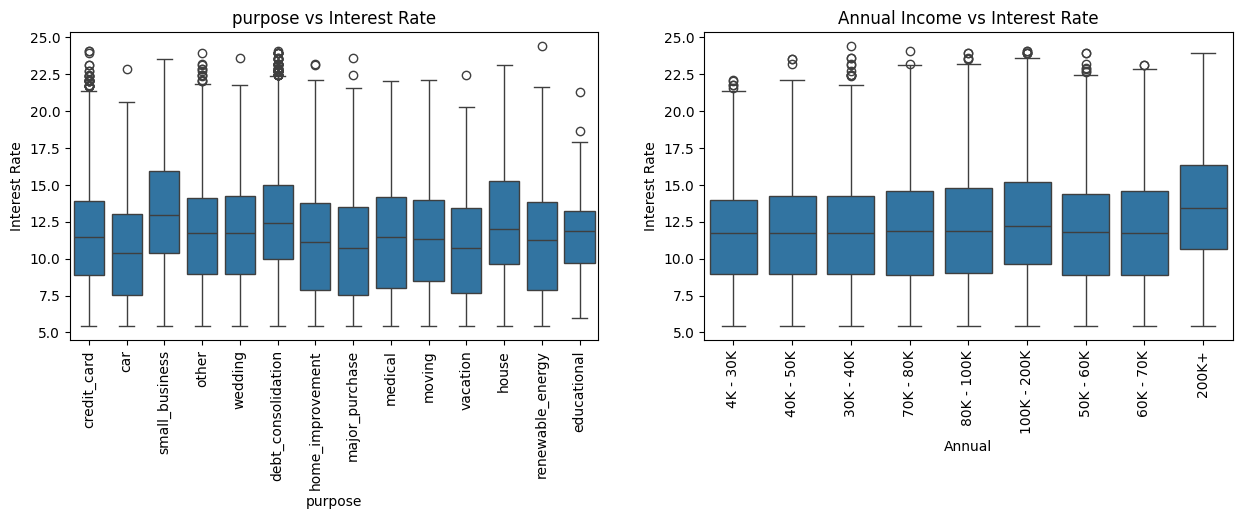

In [127]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="purpose", y="int_rate", data=loan_club)
plt.title("purpose vs Interest Rate")
plt.xlabel('purpose')
plt.ylabel('Interest Rate')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.boxplot(x="annu_inc_sub", y="int_rate", data=loan_club)
plt.title("Annual Income vs Interest Rate")
plt.xlabel('Annual')
plt.ylabel('Interest Rate')
plt.xticks(rotation=90)
plt.show()

In [128]:
### We can infer that for small_business, house and debt_consolidation, Interest rate is higher.
## Also Interest rate is higher for people with 200K+ income level. For all others, it is almost similar.

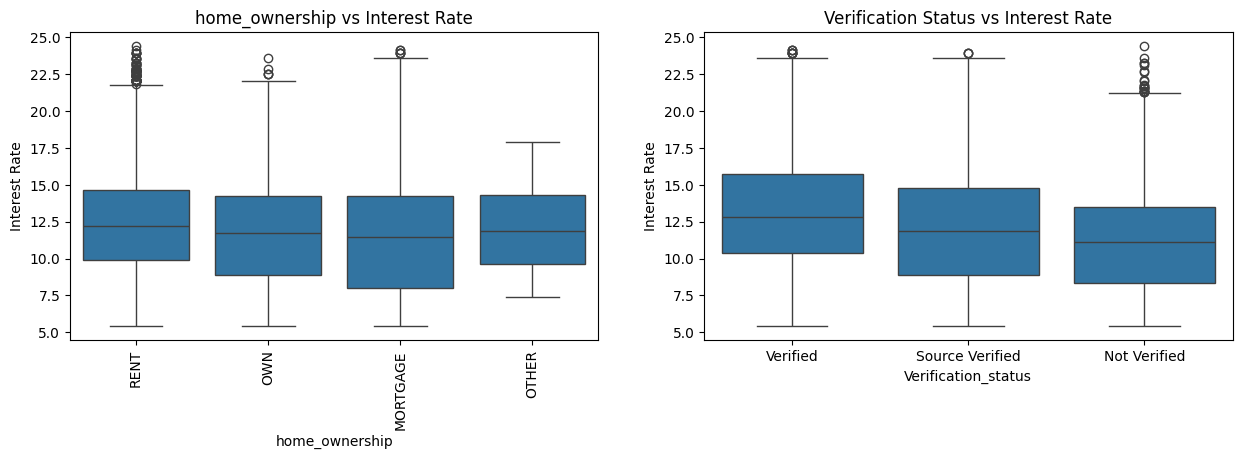

In [129]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="home_ownership", y="int_rate", data=loan_club)
plt.title("home_ownership vs Interest Rate")
plt.xlabel('home_ownership')
plt.ylabel('Interest Rate')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.boxplot(x="verification_status", y="int_rate", data=loan_club)
plt.title("Verification Status vs Interest Rate")
plt.xlabel('Verification_status')
plt.ylabel('Interest Rate')
plt.show()

In [130]:
## Here we can infer that home_ownership doesnot have much effect on Interest rate.
## Interest rate is directly proportional to Verification_status.

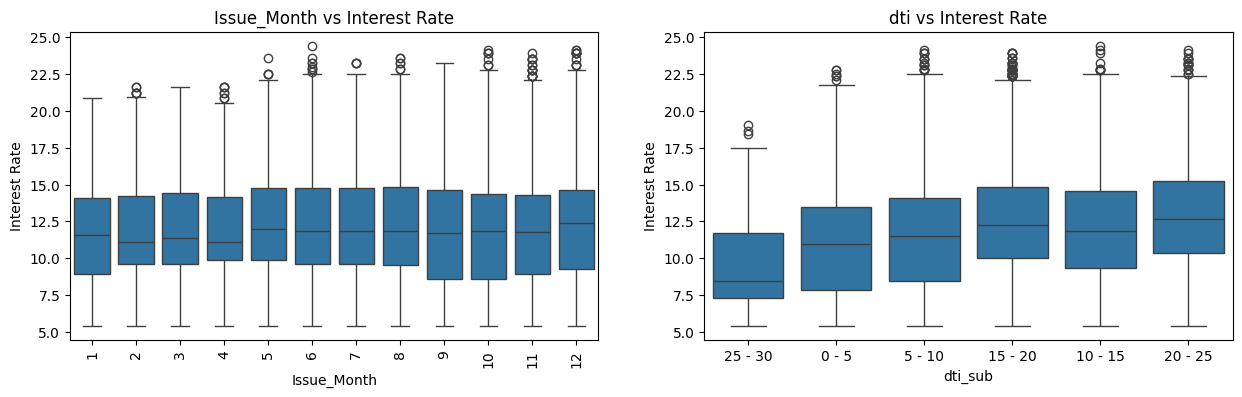

In [188]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="Issue_Month", y="int_rate", data=loan_club)
plt.title("Issue_Month vs Interest Rate")
plt.xlabel('Issue_Month')
plt.ylabel('Interest Rate')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.boxplot(x="dti_sub", y="int_rate", data=loan_club)
plt.title("dti vs Interest Rate")
plt.xlabel('dti_sub')
plt.ylabel('Interest Rate')
plt.show()

In [132]:
## Interest Rate does not have relation with Issue_Month.
## As DTI increases, Int_rate also increases but for DTI with 25-30, interest rate is less. 

Text(0, 0.5, 'Interest Rate')

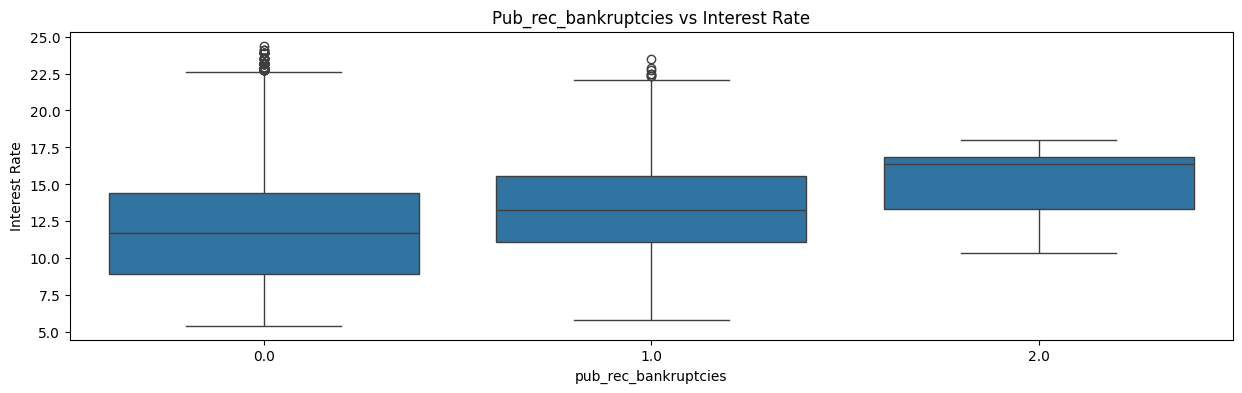

In [133]:
plt.figure(figsize=(15,4))
sns.boxplot(x="pub_rec_bankruptcies", y="int_rate", data=loan_club)
plt.title("Pub_rec_bankruptcies vs Interest Rate")
plt.xlabel('pub_rec_bankruptcies')
plt.ylabel('Interest Rate')

In [134]:
## Interest rate is directly proportional to pub_rec_banruptcies.


## Multi_variate Analysis

In [135]:
### Remove columns which are not relevant for analysis upon all above observations.
loan_club.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36787 entries, 0 to 39680
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             36787 non-null  float64       
 1   funded_amnt           36787 non-null  float64       
 2   funded_amnt_inv       36787 non-null  float64       
 3   term                  36787 non-null  int64         
 4   int_rate              36787 non-null  float64       
 5   grade                 36787 non-null  object        
 6   emp_length            36787 non-null  object        
 7   home_ownership        36787 non-null  object        
 8   annual_inc            36787 non-null  float64       
 9   verification_status   36787 non-null  object        
 10  issue_d               36787 non-null  datetime64[ns]
 11  loan_status           36787 non-null  object        
 12  purpose               36787 non-null  object        
 13  addr_state           

In [136]:
loan_club = loan_club.drop(['funded_amnt','funded_amnt_inv','pub_rec'], axis =1)

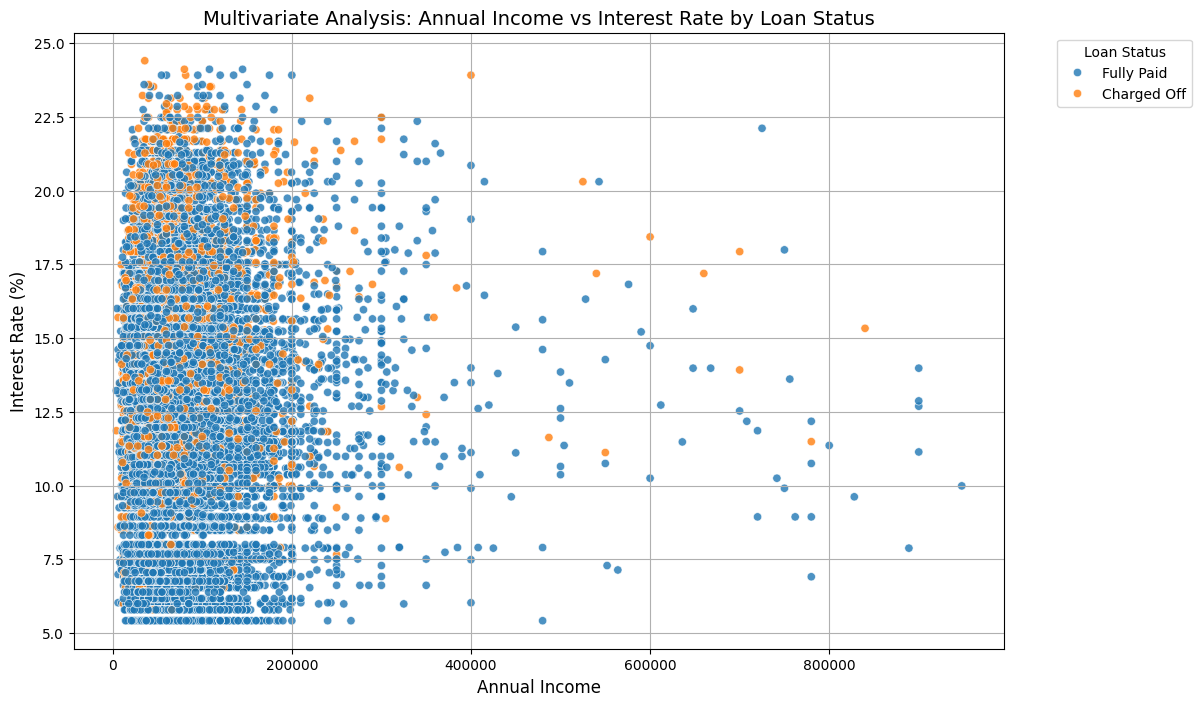

In [137]:
#### Creating Scatter Plots for understanding bivariates on Loan_status 
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=loan_club,
    x='annual_inc',
    y='int_rate',
    hue='loan_status',  # Encode loan status using color
    sizes=(20, 200),  # Scale for point sizes
    alpha=0.8  # Transparency for better visualization
)

# Customize the chart
plt.title("Multivariate Analysis: Annual Income vs Interest Rate by Loan Status", fontsize=14)
plt.xlabel("Annual Income", fontsize=12)
plt.ylabel("Interest Rate (%)", fontsize=12)
plt.legend(title="Loan Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [138]:
#### Here we can understand that higher the annual income, higher the loans are paid off. 
## We can understand that Interest rate is directly proportional to loan status. 
# That is if interest rate is less, loans are paid off and if the interest rate is more, there are more chances for loan to be charged off.

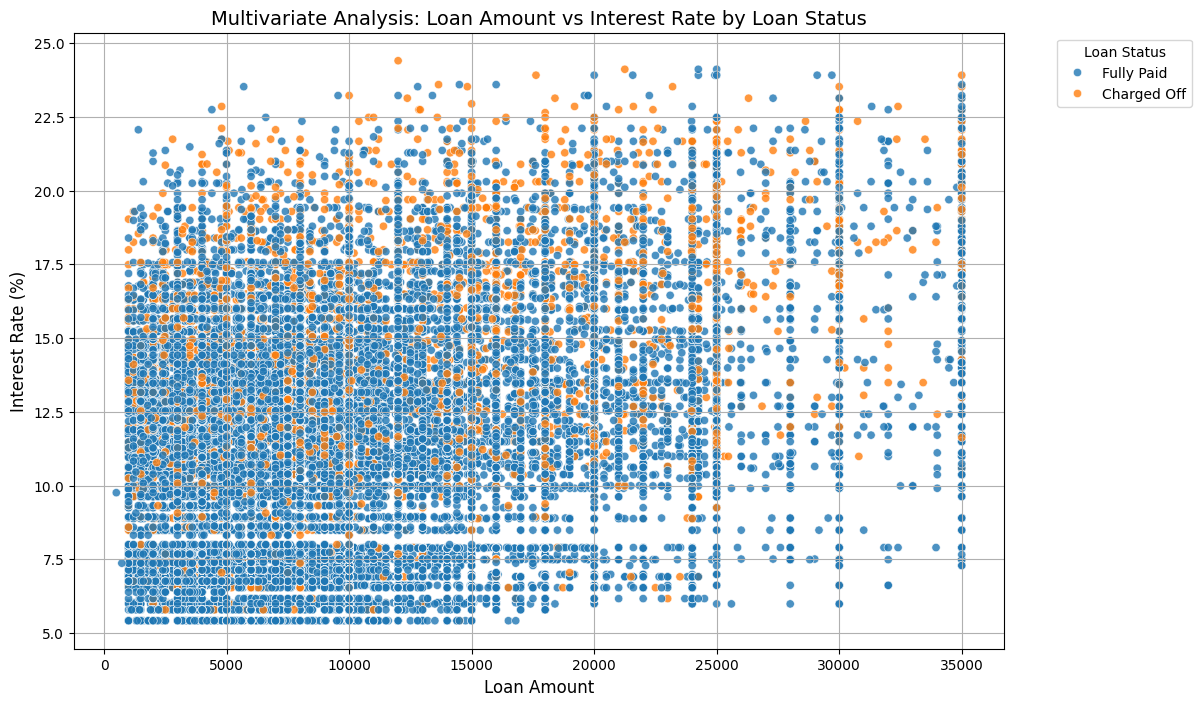

In [139]:
### Plotting Scatter Plot for Loan Amount and Interest rate to understand loan_status
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=loan_club,
    x='loan_amnt',
    y='int_rate',
    hue='loan_status', 
    sizes=(20, 200),  
    alpha=0.8  
)

# Customize the chart
plt.title("Multivariate Analysis: Loan Amount vs Interest Rate by Loan Status", fontsize=14)
plt.xlabel("Loan Amount", fontsize=12)
plt.ylabel("Interest Rate (%)", fontsize=12)
plt.legend(title="Loan Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [140]:
## Here we can get that if the loan amount and interest rate is less, there are less charged off cases. 
## As if interest rate increases and loan amount increases, charged off loans increases proportionally.

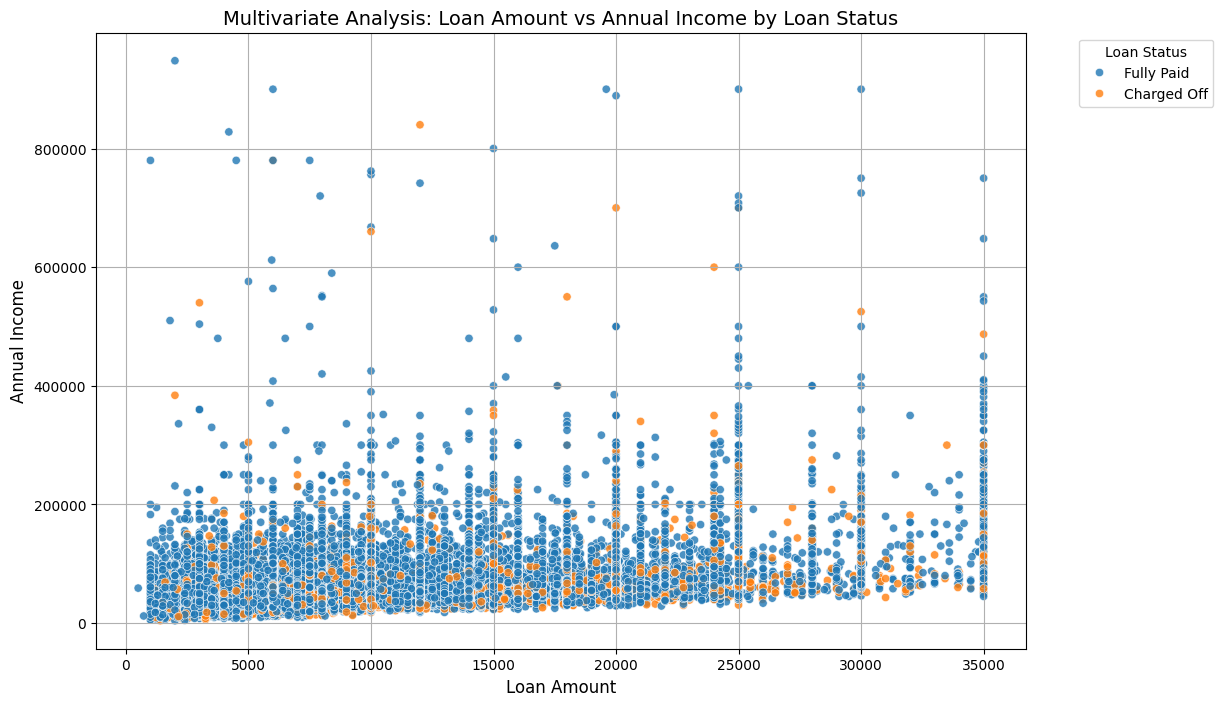

In [141]:
### Plotting Scatter Plot for Loan Amount and Annual Income to understand loan_status
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=loan_club,
    x='loan_amnt',
    y='annual_inc',
    hue='loan_status', 
    sizes=(20, 200),  
    alpha=0.8  
)

# Customize the chart
plt.title("Multivariate Analysis: Loan Amount vs Annual Income by Loan Status", fontsize=14)
plt.xlabel("Loan Amount", fontsize=12)
plt.ylabel("Annual Income", fontsize=12)
plt.legend(title="Loan Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [142]:
### If loan amount is less and annual income is also less, people pay off loans faster. 
## For loan amount more, people will start charging off loans with lesser annual income.

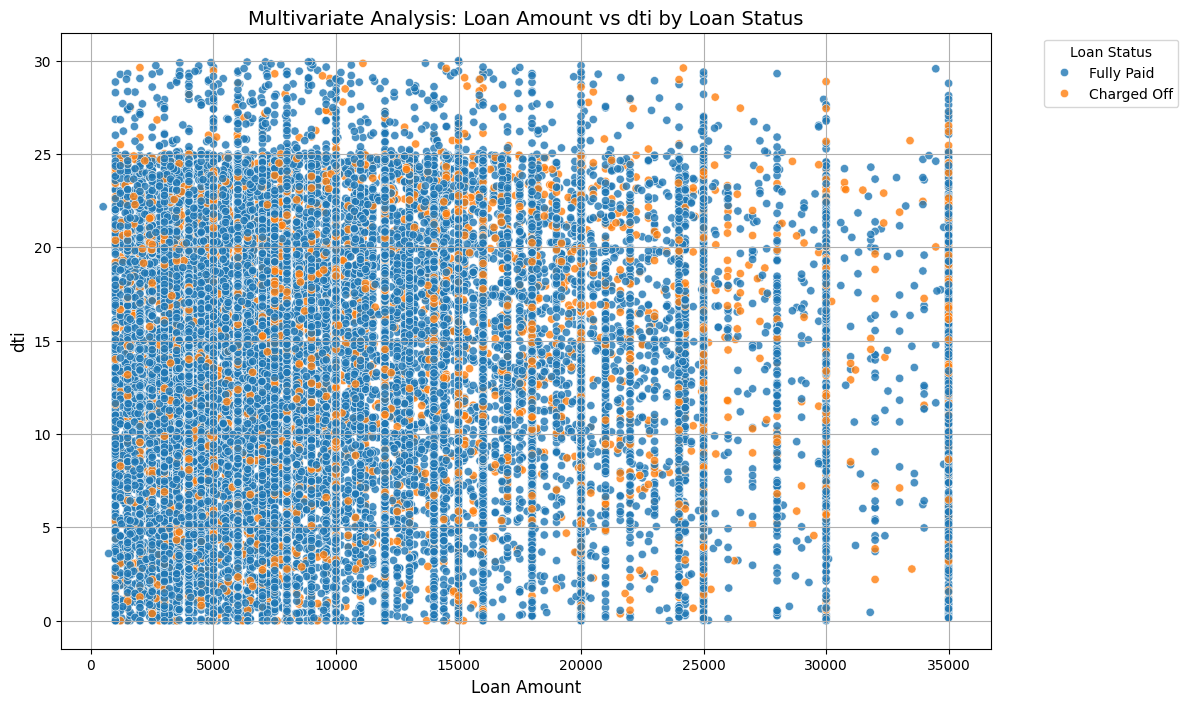

In [143]:
### Plotting Scatter Plot for Loan Amount and DTI to understand loan_status
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=loan_club,
    x='loan_amnt',
    y='dti',
    hue='loan_status', 
    sizes=(20, 200),  
    alpha=0.8  
)

# Customize the chart
plt.title("Multivariate Analysis: Loan Amount vs dti by Loan Status", fontsize=14)
plt.xlabel("Loan Amount", fontsize=12)
plt.ylabel("dti", fontsize=12)
plt.legend(title="Loan Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [144]:
### If DTI is less and loan amount is less, people tend to pay off loans. 
## Similarly if Loan amount is more, people tend to charge off loans.

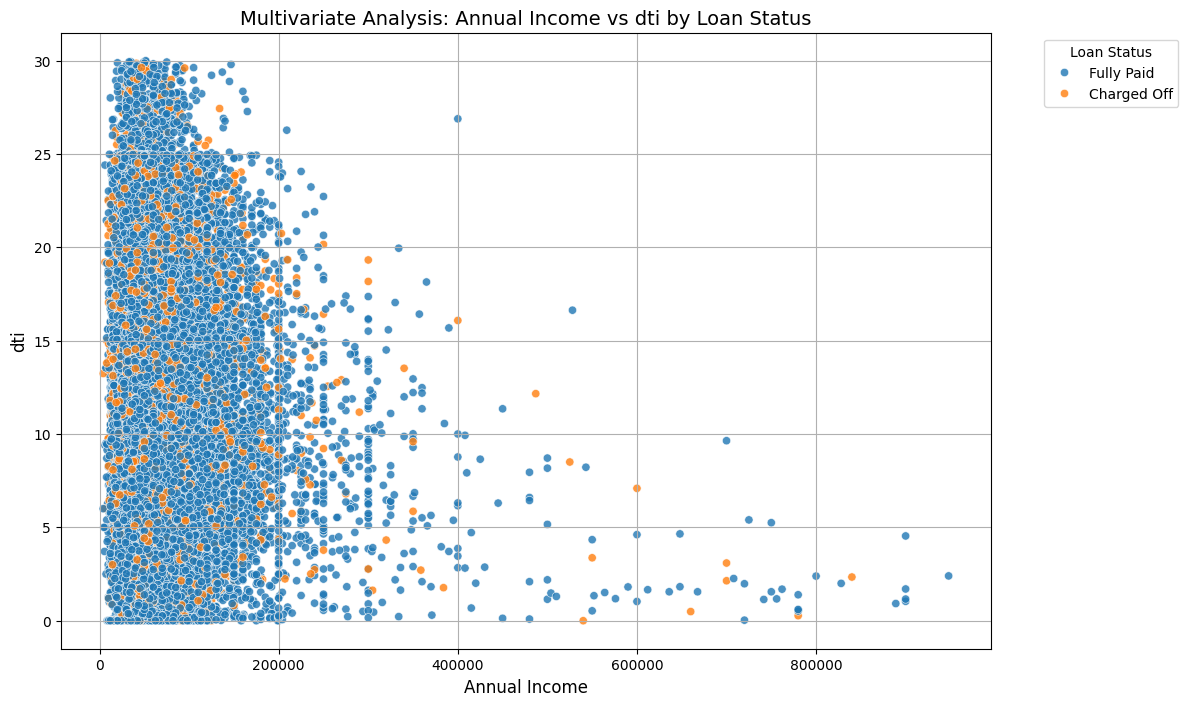

In [145]:
### Plotting Scatter Plot for Loan Amount and DTI to understand loan_status
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=loan_club,
    x='annual_inc',
    y='dti',
    hue='loan_status', 
    sizes=(20, 200),  
    alpha=0.8  
)

# Customize the chart
plt.title("Multivariate Analysis: Annual Income vs dti by Loan Status", fontsize=14)
plt.xlabel("Annual Income", fontsize=12)
plt.ylabel("dti", fontsize=12)
plt.legend(title="Loan Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

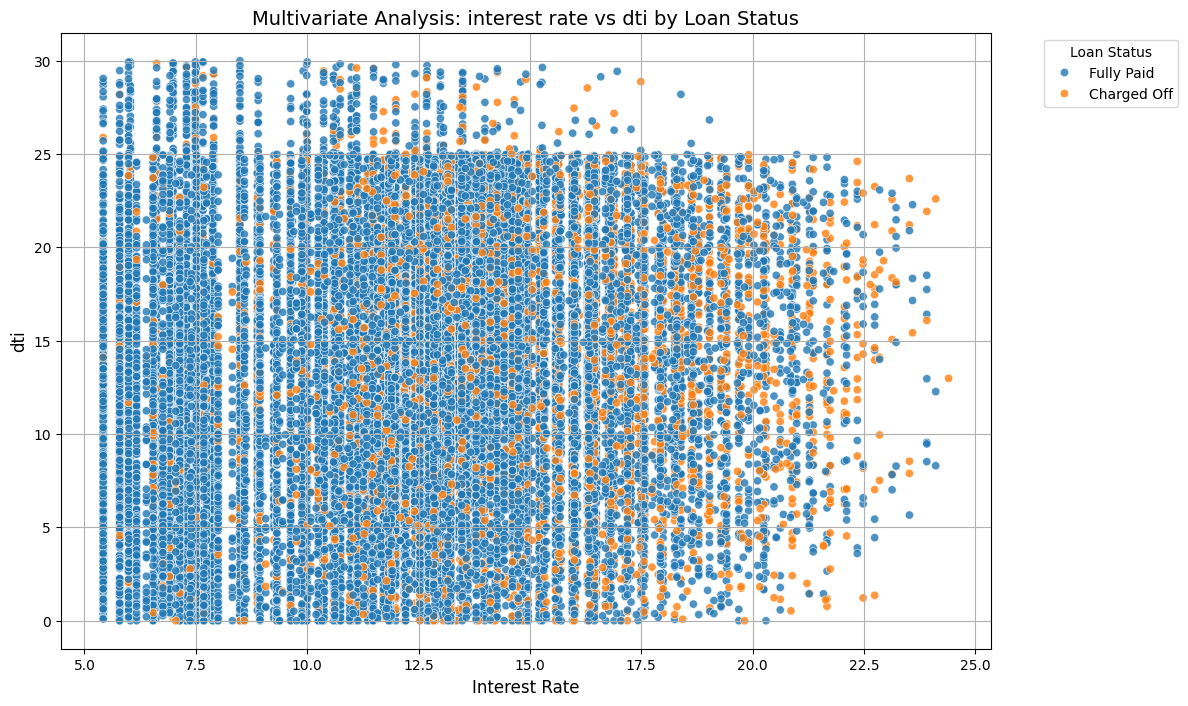

In [153]:
### Similar results if dti is more, there are more charged off records. 
### Plotting Scatter Plot for int_rate and DTI to understand loan_status
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=loan_club,
    x='int_rate',
    y='dti',
    hue='loan_status', 
    sizes=(20, 200),  
    alpha=0.8  
)

# Customize the chart
plt.title("Multivariate Analysis: interest rate vs dti by Loan Status", fontsize=14)
plt.xlabel("Interest Rate", fontsize=12)
plt.ylabel("dti", fontsize=12)
plt.legend(title="Loan Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [147]:
### If interest rate is less, even though with more DTI - people are paying off loans.
## If interest rate increases, even with less dti, there are more charged off cases. 


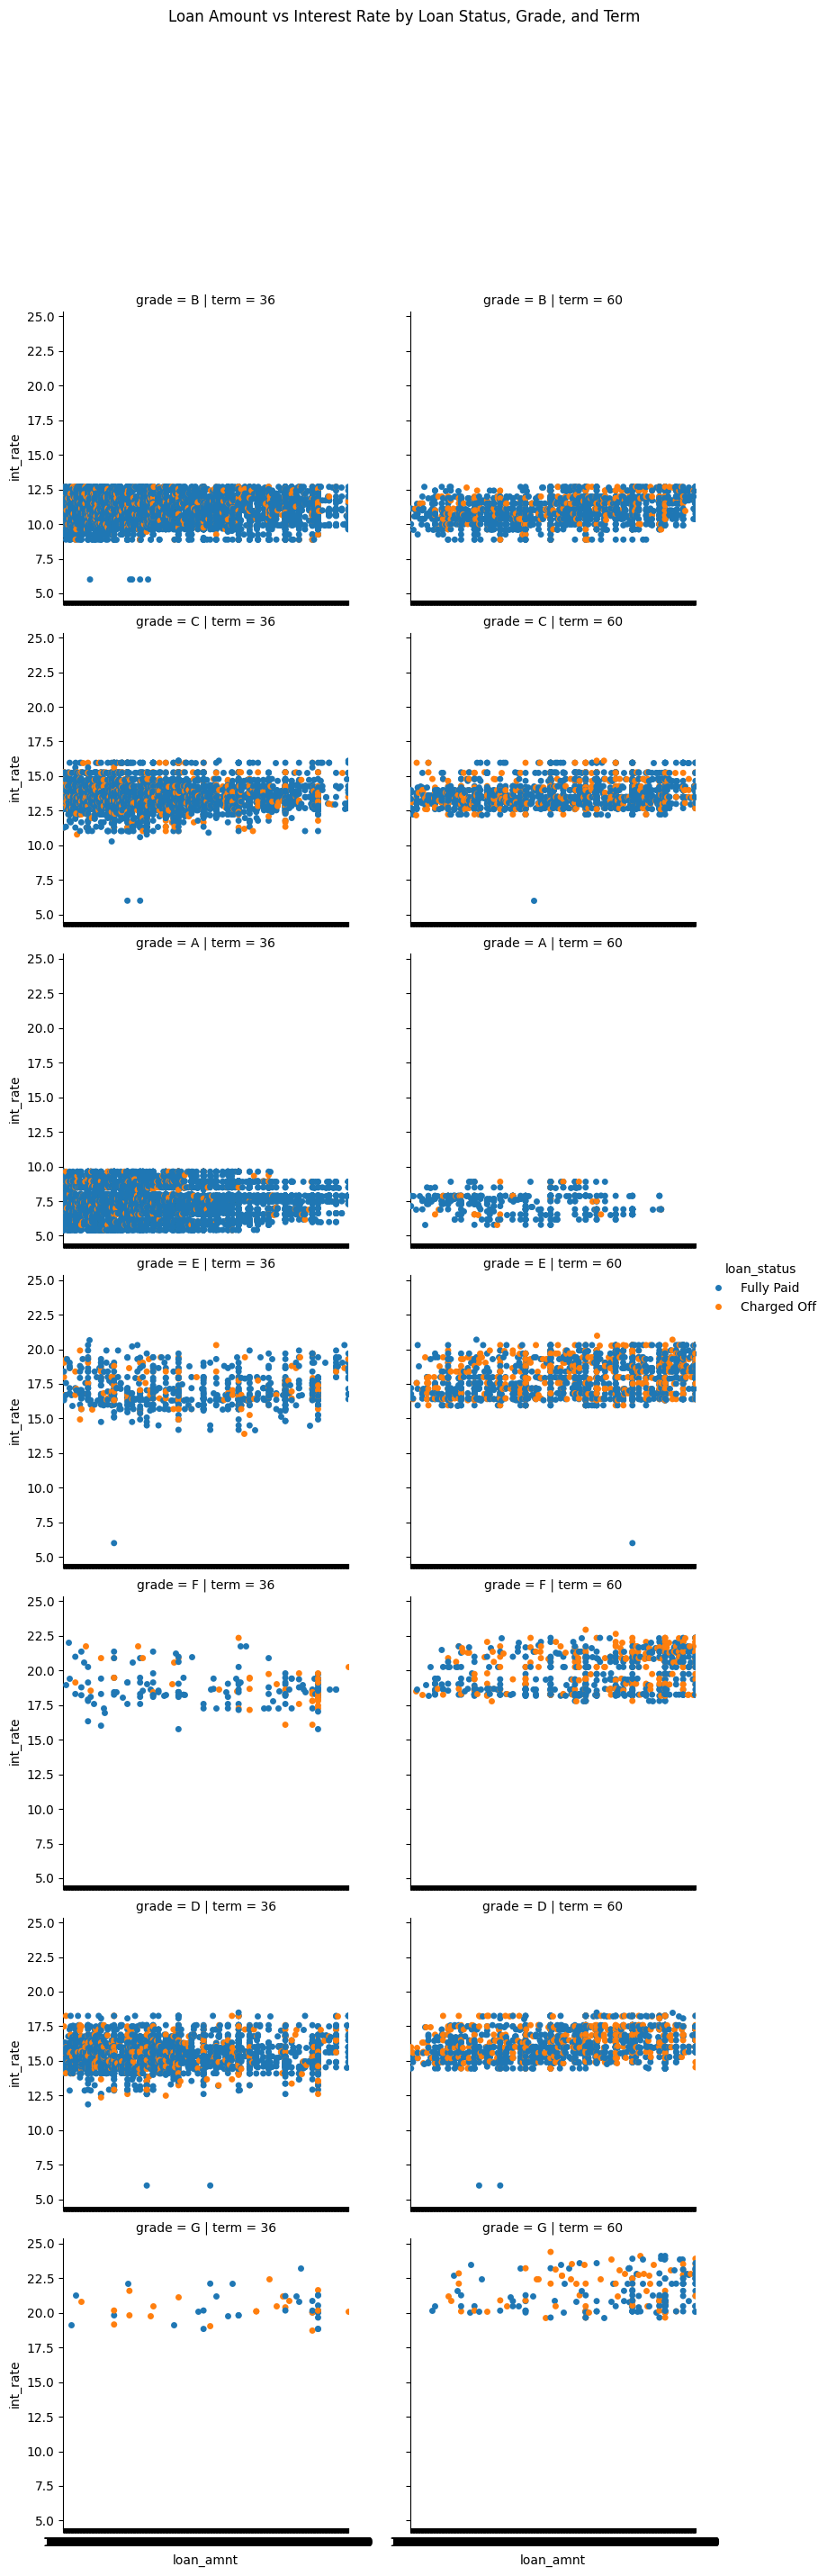

In [154]:
### Plotting Catplot for understanding segmented influence for Multivariate Analysis.
sns.catplot(
    data=loan_club,
    x='loan_amnt', 
    y='int_rate', 
    hue='loan_status', 
    col='term', 
    row='grade',
    kind='strip',
    height=4, 
    aspect=1
)
plt.subplots_adjust(top=0.9)
plt.suptitle('Loan Amount vs Interest Rate by Loan Status, Grade, and Term', y=1.02)
plt.show()

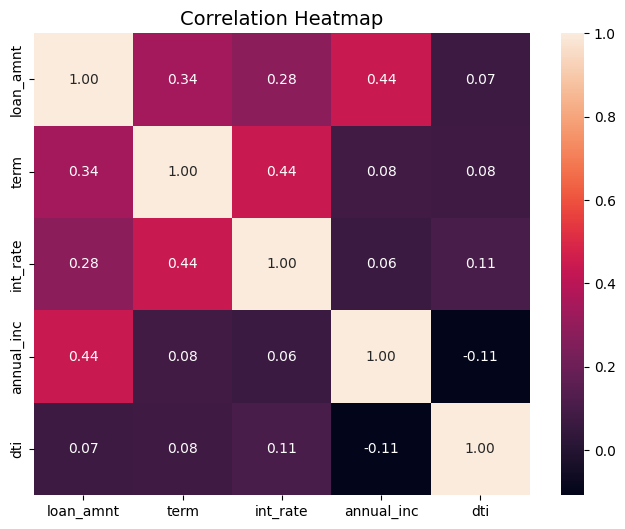

In [159]:
### Preparing for a correlation Matrix to get relations between all variables influencing
loan_club['annual_inc'] = loan_club['annual_inc'].astype('category').cat.codes
loan_club['loan_amnt'] = loan_club['loan_amnt'].astype('category').cat.codes
corr_cols = ['loan_amnt','term','int_rate','annual_inc','dti']
corr_data = loan_club[corr_cols]
corr_matrix = corr_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cbar=True)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()


In [160]:
### This heatmap shows that there is no much correlation between columns for analysis.


## Conclusions from all EDA Analysis

### We can derive that from all the analysis and recommend as below.
* Loan Amount 
    * Avoid Business Loss - Lend loans to people but for loans above 150000, lend only if interest rate is less and annual income is more than 80000.
    * Avoid Financial Loss - Lend loans with smaller amounts as there wont be much charged offs for smaller amounts.
* Interest Rate
    * Avoid Business Loss - Lend loans with higher interest rate only when loan amount is less than 150000 and annual income is more than 80000.
    * Avoid Financial Loss - Lend loans with smaller interest rates as there wont be many charged offs for small interest rates.
* Annual Income
    * Avoid Business Loss - Lend loans with less annual income only when interest rate is less and loan amount is less 
        * with term as 36 months
        * purpose for loan is not home_improvement, small_business and renewable_energy
    * Avoid Financial Loss - Lend loans with annual income more than 80000 as they will payoff loans easily.
* Term
    * Avoid Business Loss - Lend Loans with more term only when 
        * interest rate is less
        * loan amount is less than 15000
    * Avoid Financial Loss - Lend Loans with lesser term as term is more, charged offs will be more.
* Grade 
    * Avoid Business Loss - Lend Loans with Grade E, F, G only when
        * annual income is more 
        * loan amount is less
    * Avoid Financial Loss - Lend Loans with Grade A, B, C and D as there are lesser charged offs with these Grades.  
* Purpose 
    * Avoid Business Loss - Lend Loans with purpose home_improvement, small_business and renewable_energy only when 
        * interest rate is less
        * loan amount is less than 15000
        * term should be less and DTI should be less.
    * Avoid Financial Loss - Lend Loans without these purposes home_improvement, small_business and renewable_energy as there are more charged offs in these cases.
* DTI 
    * Avoid Business Loss - When lending loans with high DTI consider these reasons
        * lesser loan amount
        * Interest rate is less.
        * Grade should be A or B, Term has to be 36 months.
    * Avoid Financial Loss - Lend loans to people only with lesser DTI as if the DTI is more, there will be more charged offs.
* Issued_Months
    * Avoid Business Loss - When lending loans from January - April consider these factors.
        * Loan amount should be minimum and Annual income should be more.
        * Term should be 36 months and Interest rate should be less.
        * Grade should be A or B.
    * Avoid Financial Loss - Lend loans in the months from September to December as there will be lesser charged offs in such cases.
        